In [1]:
import torch
import numpy as np
from torch.cuda import memory    
# import umap
import matplotlib.pyplot as plt
import torch.optim as optim
import time 
# import pytorch_warmup as warmup  
from torch.optim.lr_scheduler import ReduceLROnPlateau
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # torch.device("cuda")
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Set the fraction of GPU memory to be allocated
# memory.set_per_process_memory_fraction(0.5, device=device)
# Enable caching allocator to improve memory reuse
# memory.set_allocator(memory.PooledMemoryAllocator())
import torch.nn.functional as F
# from torch_geometric.data import DataLoader
from sklearn.cluster import KMeans
# sys.path.append('.')
# from utils import change_batchsize
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score
# import batchnorm
#from torch_geometric.nn import BatchNorm
from torch.nn import Linear
import torch.nn as nn
import torch.nn.functional as F
# from torch_geometric.nn import GCNConv
# from torch_geometric.nn import global_mean_pool, global_max_pool
EPSILON = 0.0# 5 # percentage: ratio of distance of closest centroids
import networkx as nx
import os
import glob
# tqdm
from tqdm import tqdm
# from torch_geometric.data import Data, DataLoader
# import torch_geometric
import statistics
# read_dot 


In [ ]:
# save with new features: num_connected_components, num_nodes, num_edges, num_self_loops, num_weakly_connected_components, num_strongly_connected_components, shortest path, size of gcc, directed edges, undirected edgues


import os
import glob
import networkx as nx
import pandas as pd
from networkx.drawing.nx_agraph import read_dot

def log_error(file, error_message):
    with open('error_log.txt', 'a') as log_file:
        log_file.write(f"Failed to process {file}: {error_message}\n")

def extract_graph_features(file):
    features = []
    try:
        # Read the DOT file
        G = read_dot(file)
        # Ensure the graph is a directed graph
        G = nx.DiGraph(G)
        if G.number_of_nodes() == 0:
            raise ValueError("Graph has no nodes")
        # Extract graph features
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        density = nx.density(G)
        avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
        # Connected components
        num_connected_components = nx.number_connected_components(G)
        num_weakly_connected_components = nx.number_weakly_connected_components(G)
        num_strongly_connected_components = nx.number_strongly_connected_components(G)
        # Shortest path
        shortest_path = nx.average_shortest_path_length(G) if num_nodes > 1 else 0
        # Size of the largest connected component
        gcc = max(len(c) for c in nx.weakly_connected_components(G))
        # Directed edges
        num_directed_edges = sum(not e[0] == e[1] for e in G.edges())
        # Undirected edges
        num_undirected_edges = sum(e[0] == e[1] for e in G.edges())
        features.append({
            'file': file,
            'num_nodes': num_nodes,
            'num_edges': num_edges,
            'density': density,
            'avg_degree': avg_degree,
            'num_connected_components': num_connected_components,
            'num_weakly_connected_components': num_weakly_connected_components,
            'num_strongly_connected_components': num_strongly_connected_components,
            'shortest_path': shortest_path,
            'gcc': gcc,
            'num_directed_edges': num_directed_edges,
            'num_undirected_edges': num_undirected_edges
        })
    except Exception as e:
        log_error(file, str(e))
    return features

# Base directory for the files
base_dir = '/data/saranyav/malimg_gnn/exe_files/'

# Get the labels (directories)
labels = [name for name in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, name))]

# Get the labels  - the names of subdirectories # exclude the ones i've done already: 'C2LOP.P','Lolyda.AA2','Swizzor.gen!I'
labels = [label for label in labels if label not in ['C2LOP.P','Lolyda.AA2','Swizzor.gen!I']]

print(labels)

for label in labels:
    dir_name = f'{base_dir}/{label}/'
    files = glob.glob(dir_name + '*.exe_cfg')
    all_features = []
    for file in files:
        all_features.extend(extract_graph_features(file))
    # Save the features to a CSV file for this label
    if all_features:
        df = pd.DataFrame(all_features)
        csv_filename = f'graph_features_new_{label}.csv'
        df.to_csv(csv_filename, index=False)
        print(f"Feature extraction for {label} completed and saved to {csv_filename}")
    else:
        print(f"No valid graph features were extracted for {label}.")

# ['C2LOP.P','Lolyda.AA2','Swizzor.gen!I']# ['Wintrim.BX']
print(labels)

for label in labels:
    dir_name = f'{base_dir}/{label}/'
    files = glob.glob(dir_name + '*.exe_cfg')
    all_features = []
    for file in files:
        all_features.extend(extract_graph_features(file))
    # Save the features to a CSV file for this label
    if all_features:
        df = pd.DataFrame(all_features)
        csv_filename = f'graph_features_new_{label}.csv'
        df.to_csv(csv_filename, index=False)
        print(f"Feature extraction for {label} completed and saved to {csv_filename}")
    else:
        print(f"No valid graph features were extracted for {label}.")


['Autorun.K', 'Allaple.L', 'Yuner.A', 'Dontovo.A', 'Fakerean', 'Agent.FYI', 'VB.AT', 'Wintrim.BX', 'Lolyda.AT', 'Allaple.A', 'C2LOP.gen!g', 'Obfuscator.AD', 'Swizzor.gen!E', 'Instantaccess', 'Lolyda.AA3', 'Skintrim.N', 'Alueron.gen!J', 'Malex.gen!J', 'Rbot!gen', 'Dialplatform.B', 'Adialer.C', 'Lolyda.AA1']


KeyboardInterrupt: 

Read /data/saranyav/llavamal/graph_features_C2LOP.P.csv, shape: (146, 10), label: C2LOP.P
Read /data/saranyav/llavamal/graph_features_Lolyda.AA2.csv, shape: (184, 10), label: Lolyda.AA2
Read /data/saranyav/llavamal/graph_features_Autorun.K.csv, shape: (106, 10), label: Autorun.K
Read /data/saranyav/llavamal/graph_features_Swizzor.gen!I.csv, shape: (132, 10), label: Swizzor.gen!I
Combined DataFrame shape: (568, 10)
Combined CSV saved to /data/saranyav/llavamal/combined_graph_features.csv
Classification Report:
               precision    recall  f1-score   support

    Autorun.K       1.00      1.00      1.00        17
      C2LOP.P       0.97      1.00      0.99        34
   Lolyda.AA2       1.00      1.00      1.00        34
Swizzor.gen!I       1.00      0.97      0.98        29

     accuracy                           0.99       114
    macro avg       0.99      0.99      0.99       114
 weighted avg       0.99      0.99      0.99       114

Confusion Matrix:
[[17  0  0  0]
 [ 0 34  

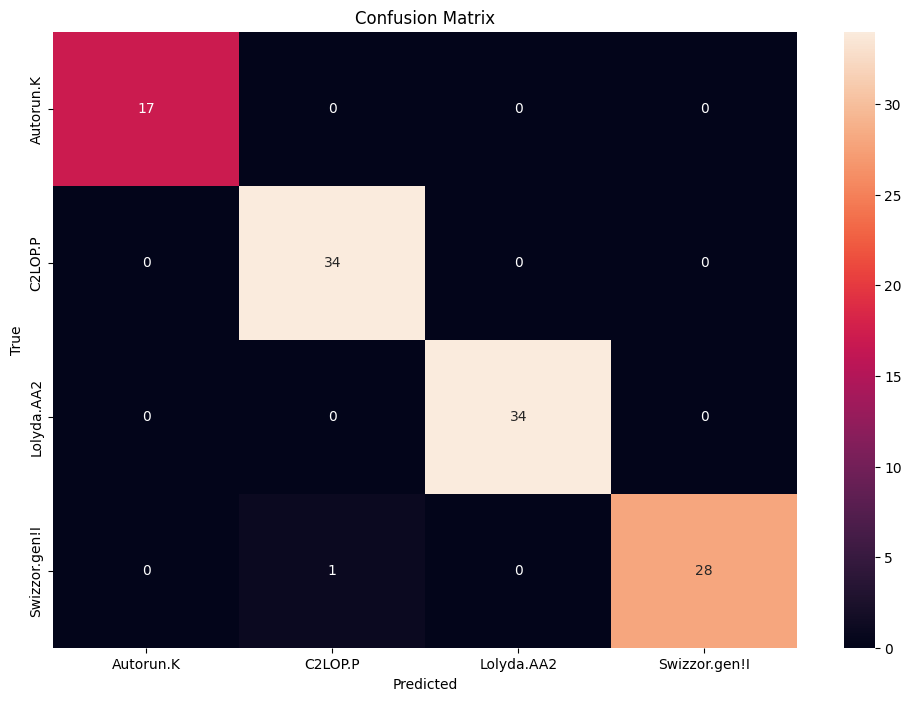

In [2]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

csv_dir = '/data/saranyav/llavamal/'

# Combine CSV files
csv_files = glob.glob(os.path.join(csv_dir, 'graph_features_*.csv')) 
# exclude anything containing 'lightweight'
csv_files = [f for f in csv_files if 'lightweight' not in f]
dfs = []
for csv_file in csv_files:
    label = os.path.splitext(os.path.basename(csv_file))[0].replace('graph_features_', '')
    df = pd.read_csv(csv_file)
    df['label'] = label
    dfs.append(df)
    print(f"Read {csv_file}, shape: {df.shape}, label: {label}")

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)
print(f"Combined DataFrame shape: {combined_df.shape}")

# Save the combined DataFrame to a CSV file
combined_csv_path = os.path.join(csv_dir, 'combined_graph_features.csv')
combined_df.to_csv(combined_csv_path, index=False)
print(f"Combined CSV saved to {combined_csv_path}")

# Prepare the data for modeling
X = combined_df.drop(columns=['file', 'label'])
y = combined_df['label']

# drop feature, num_connected_components
# X = X.drop(columns=['num_connected_components'])
# Encode the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(csv_dir, 'confusion_matrix.png'))
plt.show()


/tmp/ipykernel_1787921/348681114.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(family_df['num_connected_components'], label=family, shade=True)
/tmp/ipykernel_1787921/348681114.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(family_df['num_connected_components'], label=family, shade=True)
/tmp/ipykernel_1787921/348681114.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(family_df['num_connected_components'], label=family, shade=True)
/tmp/ipykernel_1787921/348681114.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(family_df

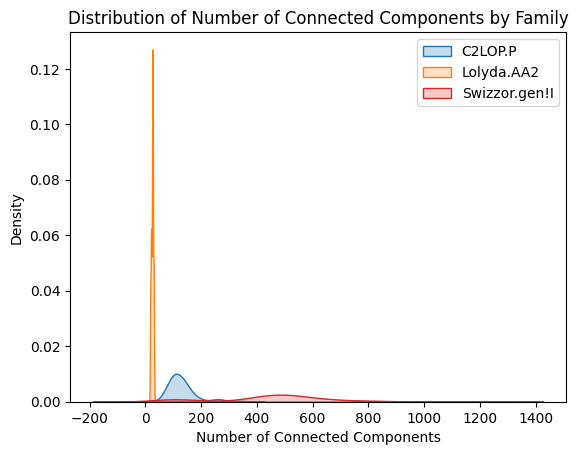

In [3]:
# plot distribution of num_connected_components by family with colors representing family

for family in combined_df['label'].unique():
    family_df = combined_df[combined_df['label'] == family]
    sns.kdeplot(family_df['num_connected_components'], label=family, shade=True)
plt.xlabel('Number of Connected Components')
plt.ylabel('Density')
plt.title('Distribution of Number of Connected Components by Family')
plt.legend()
#lt.savefig(os.path.join(csv_dir, 'num_connected_components_distribution.png'))
plt.show()


In [ ]:
# # plot distribution of num_connected_components by family 
# plt.figure(figsize=(12, 8))
# sns.boxplot(x='label', y='num_connected_components', data=combined_df)
# plt.xlabel('Family')
# plt.ylabel('Number of connected components')
# plt.title('Number of connected components by family')
# plt.xticks(rotation=45)
# plt.savefig(os.path.join(csv_dir, 'num_connected_components_by_family.png'))
# plt.show()



In [ ]:
csv_files = [f for f in csv_files if 'lightweight' not in f]


Read /data/saranyav/llavamal/graph_features_C2LOP.P.csv, shape: (146, 10), label: C2LOP.P
Read /data/saranyav/llavamal/graph_features_Lolyda.AA2.csv, shape: (184, 10), label: Lolyda.AA2
Read /data/saranyav/llavamal/graph_features_Autorun.K.csv, shape: (106, 10), label: Autorun.K
Read /data/saranyav/llavamal/graph_features_Swizzor.gen!I.csv, shape: (132, 10), label: Swizzor.gen!I
Combined DataFrame shape: (568, 10)
Combined CSV saved to /data/saranyav/llavamal/combined_graph_features.csv
Clustered CSV saved to /data/saranyav/llavamal/clustered_graph_features.csv


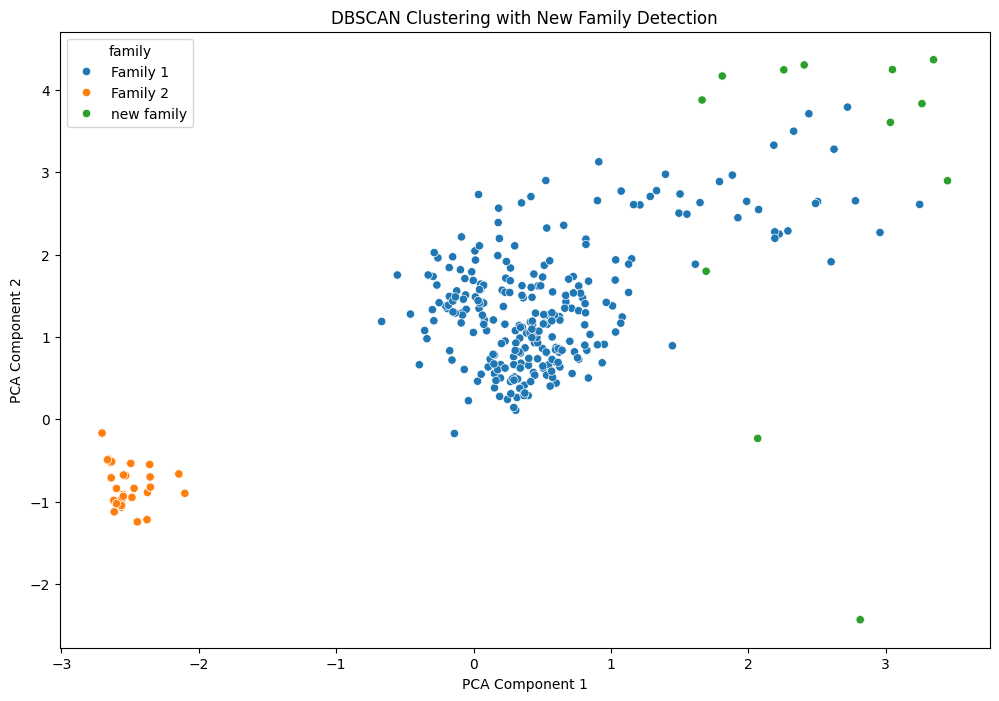

In [27]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

csv_dir = '/data/saranyav/llavamal/'

# Combine CSV files
csv_files = glob.glob(os.path.join(csv_dir, 'graph_features_*.csv'))
csv_files = [f for f in csv_files if 'lightweight' not in f]

dfs = []
for csv_file in csv_files:
    label = os.path.splitext(os.path.basename(csv_file))[0].replace('graph_features_', '')
    df = pd.read_csv(csv_file)
    df['label'] = label
    dfs.append(df)
    print(f"Read {csv_file}, shape: {df.shape}, label: {label}")

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)
print(f"Combined DataFrame shape: {combined_df.shape}")

# Save the combined DataFrame to a CSV file
combined_csv_path = os.path.join(csv_dir, 'combined_graph_features.csv')
combined_df.to_csv(combined_csv_path, index=False)
print(f"Combined CSV saved to {combined_csv_path}")

# Prepare the data for clustering
X = combined_df.drop(columns=['file', 'label'])
y = combined_df['label']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction (optional but often helpful for clustering)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_pca)

# Add the cluster labels to the DataFrame
combined_df['cluster'] = clusters

# Map clusters to known families (if DBSCAN separates them well)
# Assume clusters 0 and 1 represent the known families
cluster_labels = {0: 'Family 1', 1: 'Family 2'}
combined_df['family'] = combined_df['cluster'].map(cluster_labels).fillna('new family')

# Save the DataFrame with cluster and new family labels
clustered_csv_path = os.path.join(csv_dir, 'clustered_graph_features.csv')
combined_df.to_csv(clustered_csv_path, index=False)
print(f"Clustered CSV saved to {clustered_csv_path}")

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=combined_df['family'])
plt.title('DBSCAN Clustering with New Family Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.savefig(os.path.join(csv_dir, 'dbscan_clustering.png'))
plt.show()



In [8]:
# calculate the silhouette score
from sklearn.metrics import silhouette_score
s = silhouette_score(X_pca, clusters)
print(s)
# calculate the Davies-Bouldin index

from sklearn.metrics import davies_bouldin_score
db = davies_bouldin_score(X_pca, clusters)
print(db)

# calculate the Calinski-Harabasz index
from sklearn.metrics import calinski_harabasz_score

# calculate accuracy of new family detection
combined_df['family_correct'] = combined_df['label'] == combined_df['family']
accuracy = combined_df['family_correct'].mean()
print(f"New Family Detection Accuracy: {accuracy:.2f}")


0.5738323044694069
1.017721172320036
New Family Detection Accuracy: 0.00


In [3]:
# !pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 27.6 MB/s eta 0:00:00


/home/saranyav/.conda/envs/ctf/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

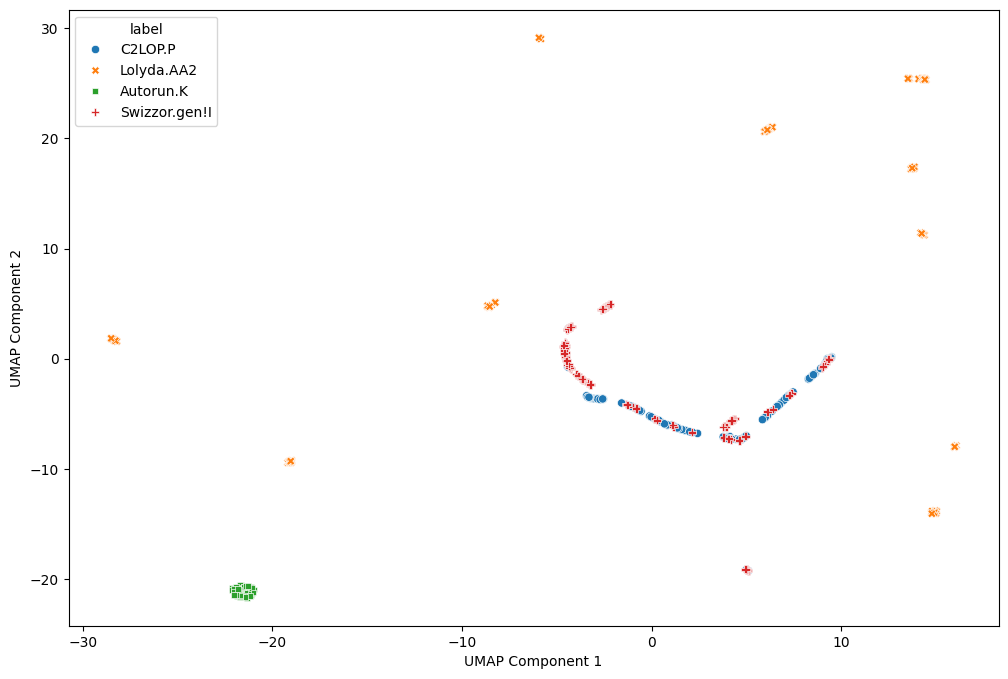

In [30]:
# plot umap from the same data
import umap 
# plot umap from the same data
reducer = umap.UMAP()
embedding = reducer.fit_transform(X)

# clear the plot
plt.clf()

# plot them as different colors and shapes 

# Visualize the UMAP embedding
plt.figure(figsize=(12, 8))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=combined_df['label'], style=combined_df['label'])
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.savefig(os.path.join(csv_dir, 'umap.png'))

plt.show()




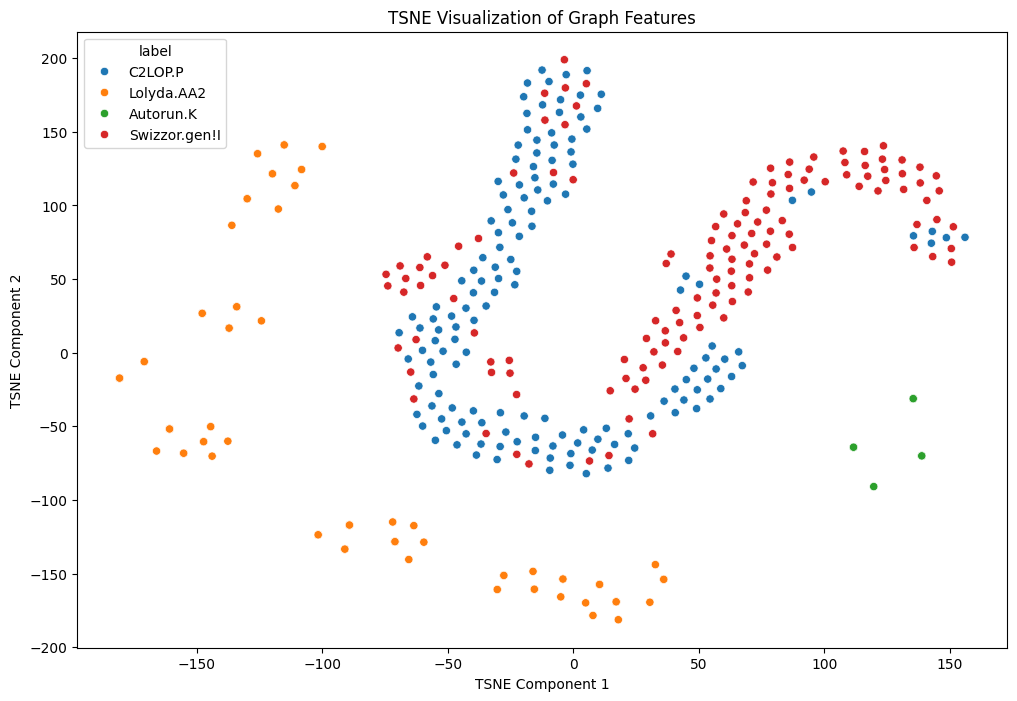

In [23]:

from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the TSNE
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y)
plt.title('TSNE Visualization of Graph Features')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.savefig(os.path.join(csv_dir, 'tsne.png'))
plt.show()


In [13]:
df.head()

file  num_nodes  num_edges  \
0  /data/saranyav/malimg_gnn/exe_files//Swizzor.g...       9312      13511   
1  /data/saranyav/malimg_gnn/exe_files//Swizzor.g...       6577       9271   
2  /data/saranyav/malimg_gnn/exe_files//Swizzor.g...      10427      13449   
3  /data/saranyav/malimg_gnn/exe_files//Swizzor.g...       9602      12160   
4  /data/saranyav/malimg_gnn/exe_files//Swizzor.g...      17931      25023   

    density  avg_degree  avg_clustering  num_connected_components  diameter  \
0  0.000156    2.901847        0.038539                       119       129   
1  0.000214    2.819218        0.040180                        71       143   
2  0.000124    2.579649        0.033801                       524        75   
3  0.000132    2.532806        0.029919                       494        74   
4  0.000078    2.791032        0.036686                       390       234   

   avg_shortest_path_length          label  
0                 28.837740  Swizzor.gen!I  
1                 48.791369  Swizzor.gen!I  
2                 28.467131  Swizzor.gen!I  
3                 30.219000  Swizzor.gen!I  
4                 65.342686  Swizzor.gen!I

In [ ]:
# hold one family out, train part of the other two families. Test on the hold out of the 2 families and the hold out of the 1 family

train_split = 0.8
test_split = 0.1
families = combined_df['label'].unique()

for family in families:
    print(f"Family: {family}")
    family_df = combined_df[combined_df['label'] == family]
    X = family_df.drop(columns=['file', 'label'])
    y = family_df['label']
    y_encoded = le.transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=1-train_split, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_split, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Test Set Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("Test Set Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    y_pred = clf.predict(X_val)
    print("Validation Set Classification Report:")
    print(classification_report(y_val, y_pred, target_names=le.classes_))
    print("Validation Set Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    print("")

In [2]:
import os
import glob
import networkx as nx
import pandas as pd
from networkx.drawing.nx_agraph import read_dot

def log_error(file, error_message):
    with open('error_log.txt', 'a') as log_file:
        log_file.write(f"Failed to process {file}: {error_message}\n")

def extract_graph_features(file):
    features = []
    try:
        # Read the DOT file
        G = read_dot(file)
        # Ensure the graph is a directed graph
        G = nx.DiGraph(G)
        if G.number_of_nodes() == 0:
            raise ValueError("Graph has no nodes")
        # Extract graph features
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        density = nx.density(G)
        avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
        avg_clustering = nx.average_clustering(G)
        num_connected_components = nx.number_connected_components(G.to_undirected())
        if nx.is_strongly_connected(G):
            diameter = nx.diameter(G)
            avg_shortest_path_length = nx.average_shortest_path_length(G)
        else:
            largest_cc = max(nx.strongly_connected_components(G), key=len)
            subgraph = G.subgraph(largest_cc).copy()
            diameter = nx.diameter(subgraph)
            avg_shortest_path_length = nx.average_shortest_path_length(subgraph)
        features.append({
            'file': file,
            'num_nodes': num_nodes,
            'num_edges': num_edges,
            'density': density,
            'avg_degree': avg_degree,
            'avg_clustering': avg_clustering,
            'num_connected_components': num_connected_components,
            'diameter': diameter,
            'avg_shortest_path_length': avg_shortest_path_length
        })
    except Exception as e:
        log_error(file, str(e))
    return features

# Base directory for the files
base_dir = '/data/saranyav/malimg_gnn/exe_files/'

# Get the labels (directories)
labels = [name for name in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, name))]

# Get the labels  - the names of subdirectories # exclude the ones i've done already: 'C2LOP.P','Lolyda.AA2','Swizzor.gen!I'
labels = [label for label in labels if label not in ['C2LOP.P','Lolyda.AA2','Swizzor.gen!I']]

print(labels)

for label in labels:
    dir_name = f'{base_dir}/{label}/'
    files = glob.glob(dir_name + '*.exe_cfg')
    all_features = []
    for file in files:
        all_features.extend(extract_graph_features(file))
    # Save the features to a CSV file for this label
    if all_features:
        df = pd.DataFrame(all_features)
        csv_filename = f'graph_features_{label}.csv'
        df.to_csv(csv_filename, index=False)
        print(f"Feature extraction for {label} completed and saved to {csv_filename}")
    else:
        print(f"No valid graph features were extracted for {label}.")

# ['C2LOP.P','Lolyda.AA2','Swizzor.gen!I']# ['Wintrim.BX']
print(labels)

for label in labels:
    dir_name = f'{base_dir}/{label}/'
    files = glob.glob(dir_name + '*.exe_cfg')
    all_features = []
    for file in files:
        all_features.extend(extract_graph_features(file))
    # Save the features to a CSV file for this label
    if all_features:
        df = pd.DataFrame(all_features)
        csv_filename = f'graph_features_{label}.csv'
        df.to_csv(csv_filename, index=False)
        print(f"Feature extraction for {label} completed and saved to {csv_filename}")
    else:
        print(f"No valid graph features were extracted for {label}.")


['C2LOP.P', 'Lolyda.AA2', 'Swizzor.gen!I']
old features extracted
self loops extracted
other features extracted
old features extracted
self loops extracted
other features extracted
old features extracted
self loops extracted
other features extracted


KeyboardInterrupt: 

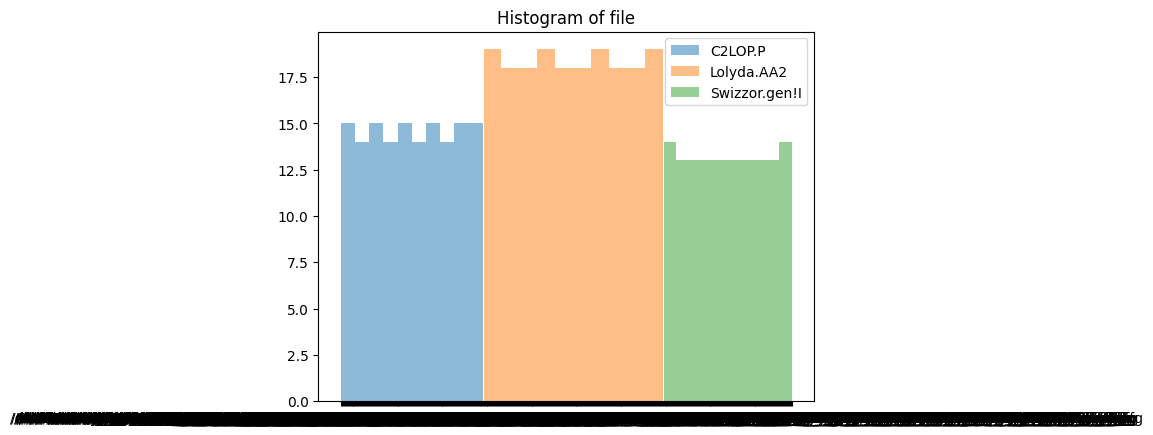

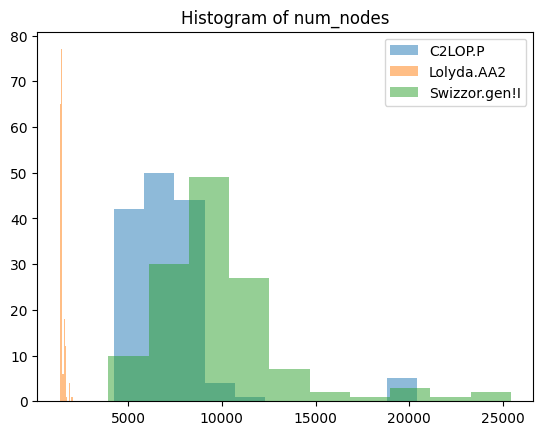

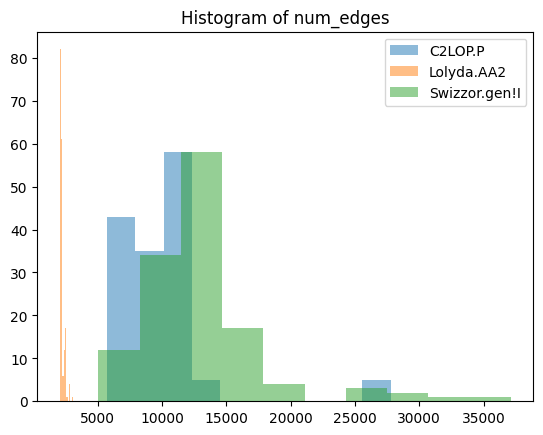

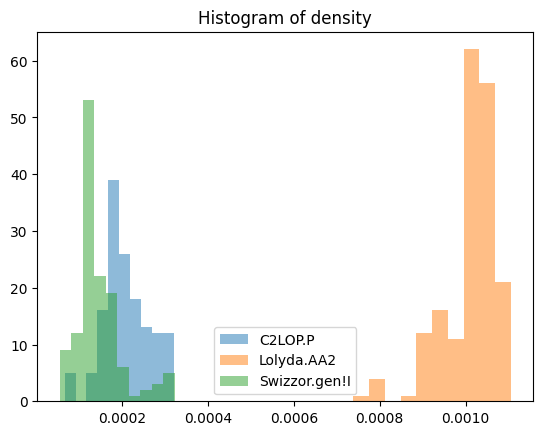

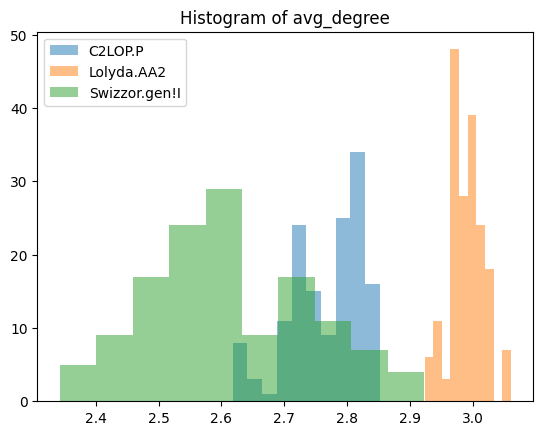

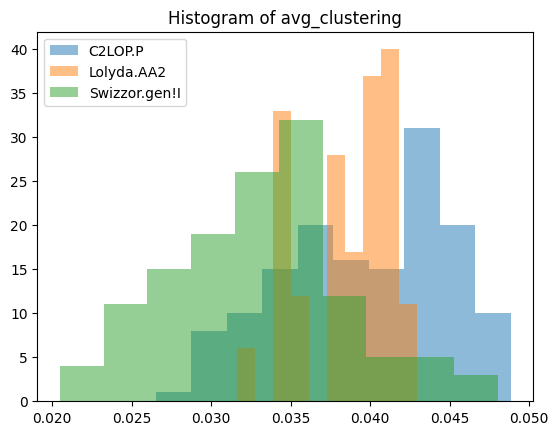

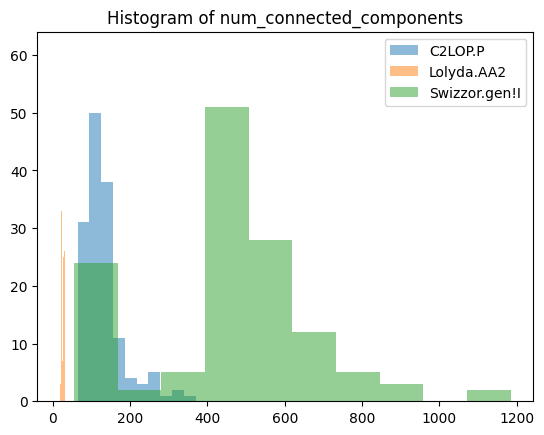

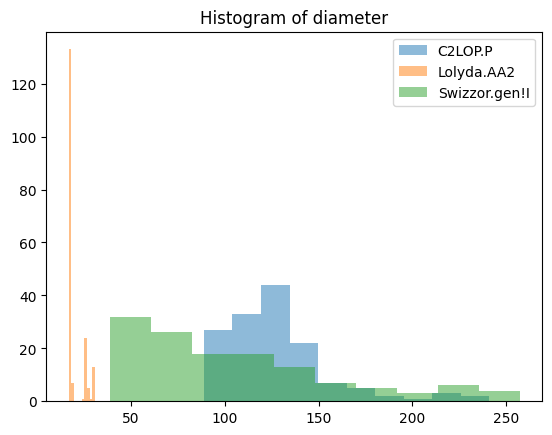

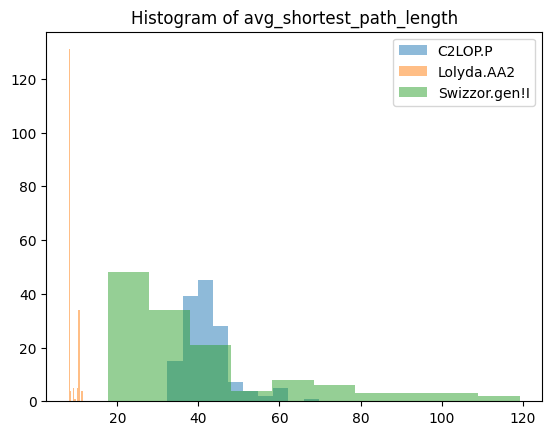

KeyError: 'label'

<Figure size 640x480 with 0 Axes>

In [21]:
# for each feature, plot all three labels on the same graph and show plot, do this for each feature and don't save plot
labels = ['C2LOP.P','Lolyda.AA2','Swizzor.gen!I']
for feature in df.columns:
    plt.figure()
    for label in labels:
        csv_filename = f'graph_features_{label}.csv'
        df = pd.read_csv(csv_filename)
        plt.hist(df[feature], alpha=0.5, label=label)
    plt.title(f'Histogram of {feature}')
    plt.legend()
    plt.show()

In [15]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csv_dir = '/data/saranyav/llavamal/'


csv_files = glob.glob(os.path.join(csv_dir, 'graph_features_*.csv'))
dfs = []
for csv_file in csv_files:
    label = os.path.splitext(os.path.basename(csv_file))[0].replace('graph_features_', '')
    df = pd.read_csv(csv_file)
    df['label'] = label
    dfs.append(df)
    print(f"Read {csv_file}, shape: {df.shape}, label: {label}")

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)
print(f"Combined DataFrame shape: {combined_df.shape}")

# Save the combined DataFrame to a CSV file
combined_csv_path = os.path.join(csv_dir, 'combined_graph_features.csv')
combined_df.to_csv(combined_csv_path, index=False)
print(f"Combined CSV saved to {combined_csv_path}")

# Verify the 'label' column creation
print("Sample data with labels:")
print(combined_df[['file', 'label']].head())

# Define a subset of variables to plot
#variables_to_plot = ['num_nodes', 'num_edges', 'density', 'avg_degree', 'avg_clustering', 'diameter', 'avg_shortest_path_length']
variables_to_plot = ['num_nodes', 'num_edges', 'density', 'avg_degree', 'num_connected_components', 'num_self_loops']

# Create a directory to save individual plots
plots_dir = os.path.join(csv_dir, 'individual_plots')
os.makedirs(plots_dir, exist_ok=True)

# Plot each pair of variables individually with different labels as different colors
for i, var1 in enumerate(variables_to_plot):
    for var2 in variables_to_plot[i+1:]:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=combined_df, x=var1, y=var2, hue='label', palette='tab10')
        plt.title(f'{var1} vs {var2}')
        plot_filename = os.path.join(plots_dir, f'{var1}_vs_{var2}.png')
        plt.savefig(plot_filename)
        plt.close()
        print(f"Plot saved: {plot_filename}")



# # Combine CSV files
# csv_files = glob.glob(os.path.join(csv_dir, 'graph_features_*.csv'))
# dfs = []
# for csv_file in csv_files:
#     df = pd.read_csv(csv_file)
#     dfs.append(df)

# # Concatenate all DataFrames into one
# combined_df = pd.concat(dfs, ignore_index=True)

# # Save the combined DataFrame to a CSV file
# combined_csv_path = os.path.join(csv_dir, 'combined_graph_features.csv')
# combined_df.to_csv(combined_csv_path, index=False)
# print(f"Combined CSV saved to {combined_csv_path}")

# # Define a subset of variables to plot
# variables_to_plot = ['num_nodes', 'num_edges', 'density', 'avg_degree', 'avg_clustering', 'diameter', 'avg_shortest_path_length']

# # Create a directory to save individual plots
# plots_dir = os.path.join(csv_dir, 'individual_plots')
# os.makedirs(plots_dir, exist_ok=True)

# # Ensure 'label' column exists for color coding
# if 'label' not in combined_df.columns:
#     combined_df['label'] = combined_df['file'].apply(lambda x: os.path.basename(os.path.dirname(x)))

# # Plot each pair of variables individually with different labels as different colors
# for i, var1 in enumerate(variables_to_plot):
#     for var2 in variables_to_plot[i+1:]:
#         plt.figure(figsize=(8, 6))
#         sns.scatterplot(data=combined_df, x=var1, y=var2, hue='label', palette='tab10')
#         plt.title(f'{var1} vs {var2}')
#         plot_filename = os.path.join(plots_dir, f'{var1}_vs_{var2}.png')
#         plt.savefig(plot_filename)
#         plt.close()
#         print(f"Plot saved: {plot_filename}")


Read /data/saranyav/llavamal/graph_features_lightweight_Lolyda.AA2.csv, shape: (184, 8), label: Lolyda.AA2
Read /data/saranyav/llavamal/graph_features_lightweight_Swizzor.gen!I.csv, shape: (132, 8), label: Swizzor.gen!I
Read /data/saranyav/llavamal/graph_features_lightweight_C2LOP.P.csv, shape: (146, 8), label: C2LOP.P
Combined DataFrame shape: (462, 8)
Combined CSV saved to /data/saranyav/llavamal/combined_graph_features_lightweight.csv
Sample data with labels:
                                                file       label
0  /data/saranyav/malimg_gnn/exe_files//Lolyda.AA...  Lolyda.AA2
1  /data/saranyav/malimg_gnn/exe_files//Lolyda.AA...  Lolyda.AA2
2  /data/saranyav/malimg_gnn/exe_files//Lolyda.AA...  Lolyda.AA2
3  /data/saranyav/malimg_gnn/exe_files//Lolyda.AA...  Lolyda.AA2
4  /data/saranyav/malimg_gnn/exe_files//Lolyda.AA...  Lolyda.AA2
Plot saved: /data/saranyav/llavamal/individual_plots/num_nodes_vs_num_edges.png
Plot saved: /data/saranyav/llavamal/individual_plots/num_nodes_

Classification Report:
               precision    recall  f1-score   support

      C2LOP.P       0.79      0.79      0.79        29
   Lolyda.AA2       1.00      1.00      1.00        42
Swizzor.gen!I       0.73      0.73      0.73        22

     accuracy                           0.87        93
    macro avg       0.84      0.84      0.84        93
 weighted avg       0.87      0.87      0.87        93



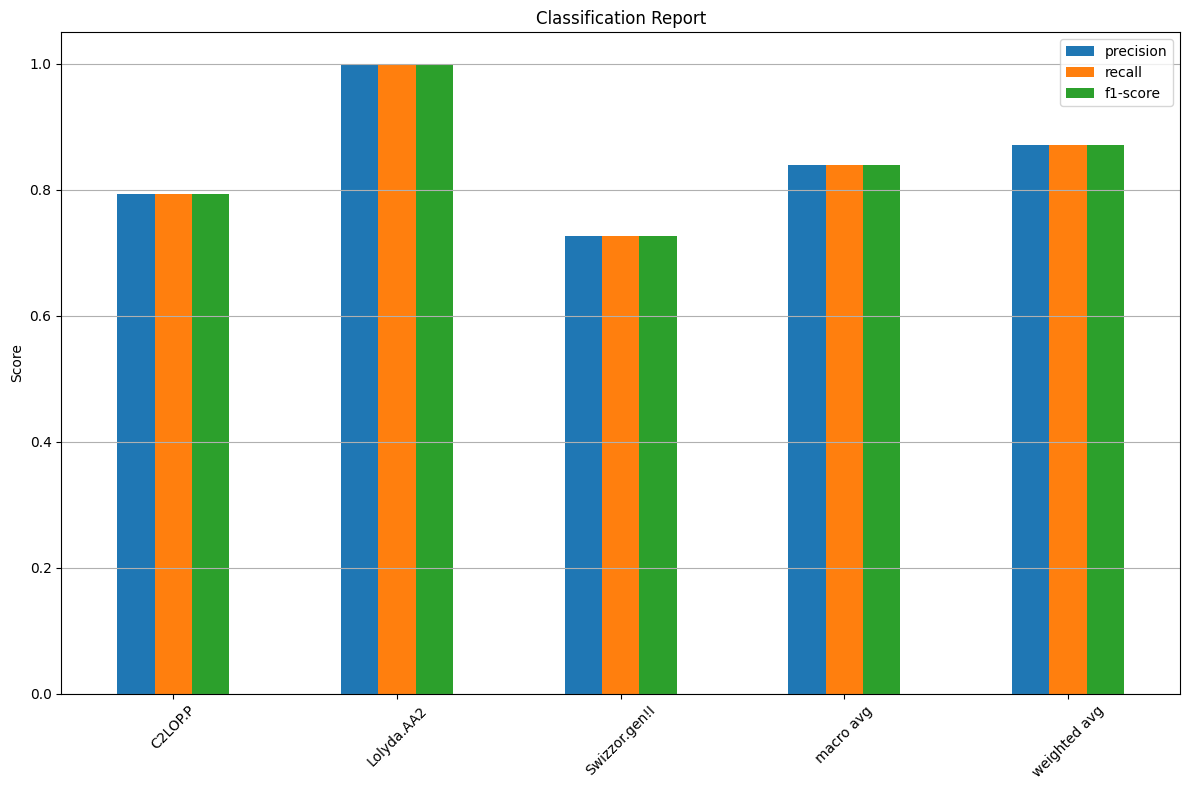

In [17]:
# plot classification report from above


import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Plot the  precision, recall, and F1-score for each class
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
report_df = pd.DataFrame(report).T
report_df.drop(columns=['support'], inplace=True)
report_df = report_df.drop('accuracy')
report_df.plot(kind='bar', figsize=(12, 8))
plt.title('Classification Report')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
#plt.savefig(os.path.join(csv_dir, 'classification_report.png'))
plt.show()



Mean Squared Error: 0.3676142612507312


Text(0.5, 1.0, 'Predicted vs Actual')

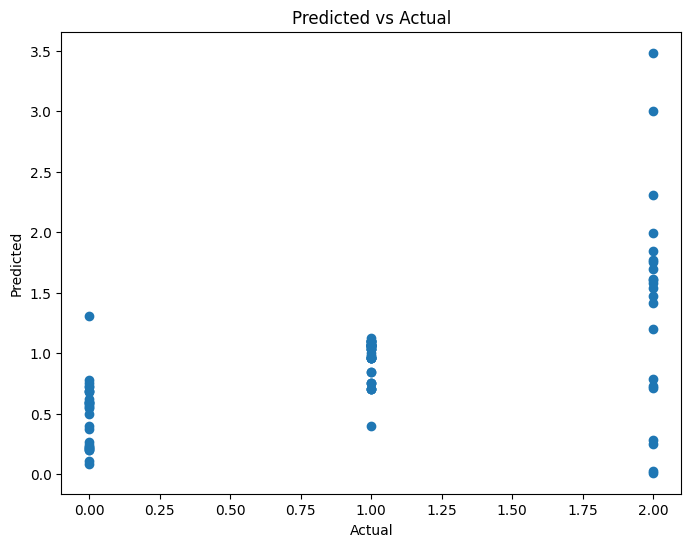

In [18]:
# train linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# use earlier training and test splits

# Train the model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict on the test set
y_pred = reg.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')



In [2]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 12.6 MB/s eta 0:00:00
  Using cached accelerate-0.21.0-py3-none-any.whl.metadata (17 kB)
  Using cached jsonschema-4.21.1-py3-none-any.whl.metadata (7.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 28.6 MB/s eta 0:00:00
  Using cached toolz-0.12.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Using cached protobuf-5.27.3-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes

In [19]:
# autogluon 
import os 

from autogluon.tabular import TabularDataset, TabularPredictor

# Load the data
train_data = TabularDataset(os.path.join(csv_dir, 'combined_graph_features.csv'))

# Define the label column
label = 'label'

# Define the problem type
problem_type = 'multiclass'

# Train the model
predictor = TabularPredictor(label=label, problem_type=problem_type).fit(train_data)

# Evaluate the model
predictor.leaderboard(train_data, silent=True)




/home/saranyav/.conda/envs/ctf/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No path specified. Models will be saved in: "AutogluonModels/ag-20240815_122917"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.8
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #156-Ubuntu SMP Fri Jan 20 17:27:18 UTC 2023
CPU Count:          64
Memory Avail:       492.94 GB / 503.76 GB (97.9%)
Disk Space Avail:   5596.83 GB / 12936.36 GB (43.3%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maxi

model  score_test  score_val eval_metric  pred_time_test  \
0      RandomForestGini    0.989177   0.946237    accuracy        0.078031   
1        ExtraTreesGini    0.989177   0.946237    accuracy        0.086215   
2   WeightedEnsemble_L2    0.989177   0.946237    accuracy        0.087368   
3        ExtraTreesEntr    0.989177   0.946237    accuracy        0.097411   
4      RandomForestEntr    0.989177   0.946237    accuracy        0.098250   
5        KNeighborsDist    0.978355   0.892473    accuracy        0.032974   
6         LightGBMLarge    0.967532   0.913978    accuracy        0.000874   
7            LightGBMXT    0.956710   0.946237    accuracy        0.002778   
8               XGBoost    0.956710   0.924731    accuracy        0.022885   
9              LightGBM    0.952381   0.935484    accuracy        0.001492   
10       NeuralNetTorch    0.952381   0.935484    accuracy        0.009431   
11             CatBoost    0.945887   0.946237    accuracy        0.005483   
12       KNeighborsUnif    0.926407   0.903226    accuracy        0.047306   
13      NeuralNetFastAI    0.911255   0.935484    accuracy        0.021369   

    pred_time_val  fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0        0.063644  0.729700                 0.078031                0.063644   
1        0.064225  0.696987                 0.086215                0.064225   
2        0.064660  0.768242                 0.001153                0.000435   
3        0.062329  0.629882                 0.097411                0.062329   
4        0.063442  0.653637                 0.098250                0.063442   
5        0.032039  0.008750                 0.032974                0.032039   
6        0.001772  3.047364                 0.000874                0.001772   
7        0.001349  0.634609                 0.002778                0.001349   
8        0.001647  0.503146                 0.022885                0.001647   
9        0.000881  0.870180                 0.001492                0.000881   
10       0.005002  1.752436                 0.009431                0.005002   
11       0.000966  0.566770                 0.005483                0.000966   
12       0.035363  0.010058                 0.047306                0.035363   
13       0.005846  0.482239                 0.021369                0.005846   

    fit_time_marginal  stack_level  can_infer  fit_order  
0            0.729700            1       True          6  
1            0.696987            1       True          9  
2            0.071256            2       True         14  
3            0.629882            1       True         10  
4            0.653637            1       True          7  
5            0.008750            1       True          2  
6            3.047364            1       True         13  
7            0.634609            1       True          4  
8            0.503146            1       True         11  
9            0.870180            1       True          5  
10           1.752436            1       True         12  
11           0.566770            1       True          8  
12           0.010058            1       True          1  
13           0.482239            1       True          3

In [20]:
feature_importance = predictor.feature_importance(train_data)
feature_importance

These features in provided data are not utilized by the predictor and will be ignored: ['file']
Computing feature importance via permutation shuffling for 8 features using 462 rows with 5 shuffle sets...
	3.5s	= Expected runtime (0.7s per shuffle set)
	0.61s	= Actual runtime (Completed 5 of 5 shuffle sets)


importance    stddev   p_value  n  p99_high  \
num_connected_components    0.040693  0.006565  0.000079  5  0.054211   
density                     0.020346  0.002468  0.000025  5  0.025428   
avg_clustering              0.019048  0.003557  0.000139  5  0.026371   
num_nodes                   0.016450  0.003622  0.000265  5  0.023908   
num_edges                   0.016017  0.003283  0.000200  5  0.022776   
avg_shortest_path_length    0.014286  0.004983  0.001521  5  0.024546   
avg_degree                  0.012554  0.006006  0.004746  5  0.024921   
diameter                    0.007359  0.002468  0.001314  5  0.012441   

                           p99_low  
num_connected_components  0.027175  
density                   0.015265  
avg_clustering            0.011724  
num_nodes                 0.008993  
num_edges                 0.009258  
avg_shortest_path_length  0.004026  
avg_degree                0.000187  
diameter                  0.002278

In [21]:
# feature importance from autogluon

# Get the feature importance
feature_importance = predictor.feature_importance(train_data)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='label', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig(os.path.join(csv_dir, 'feature_importance.png'))
plt.show()


These features in provided data are not utilized by the predictor and will be ignored: ['file']
Computing feature importance via permutation shuffling for 8 features using 462 rows with 5 shuffle sets...
	4.32s	= Expected runtime (0.86s per shuffle set)
	0.63s	= Actual runtime (Completed 5 of 5 shuffle sets)


ValueError: Could not interpret value `label` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x800 with 0 Axes>

Text(0, 0.5, 'Model')

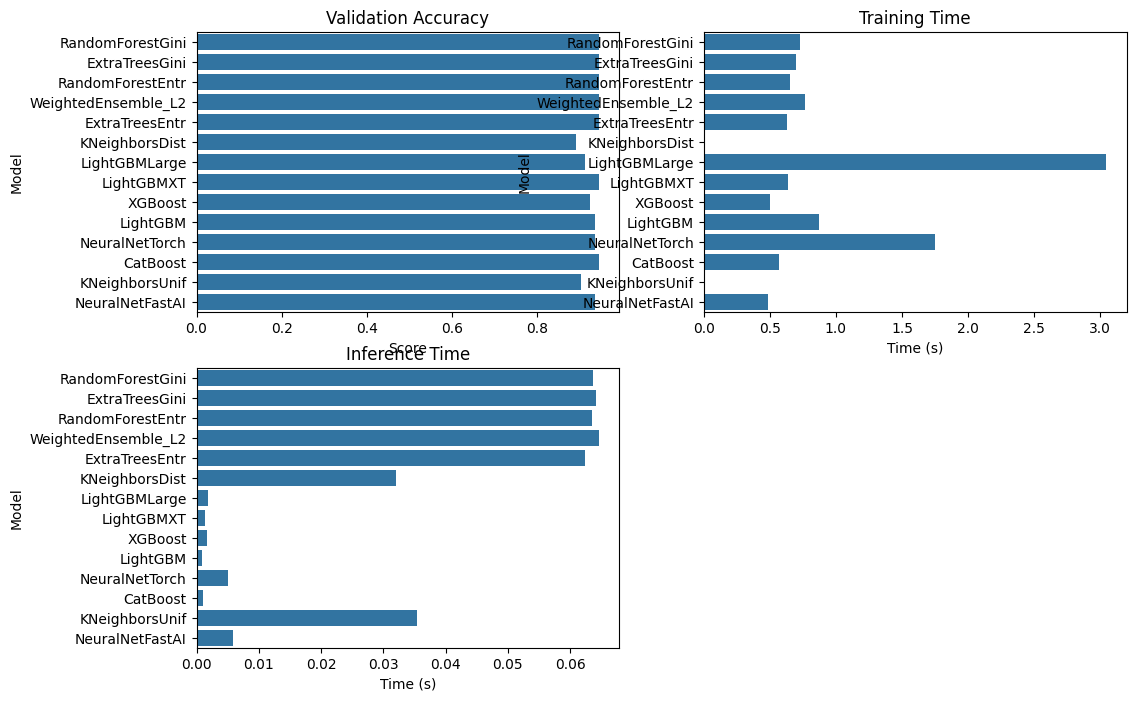

In [22]:
# plot autogluon results accuracy, score, time, etc  on separate plots 

# Load the leaderboard
leaderboard = predictor.leaderboard(train_data, silent=True)

# Plot the leaderboard
plt.figure(figsize=(12, 8))

# Plot the accuracy
plt.subplot(2, 2, 1)
sns.barplot(data=leaderboard, x='score_val', y='model')
plt.title('Validation Accuracy')
plt.xlabel('Score')
plt.ylabel('Model')

# Plot the training time
plt.subplot(2, 2, 2)
sns.barplot(data=leaderboard, x='fit_time', y='model')
plt.title('Training Time')
plt.xlabel('Time (s)')
plt.ylabel('Model')

# Plot the inference time
plt.subplot(2, 2, 3)
sns.barplot(data=leaderboard, x='pred_time_val', y='model')
plt.title('Inference Time')
plt.xlabel('Time (s)')
plt.ylabel('Model')




In [ ]:
# 3D seaborn to try to get blue and green to be separable 
# separability - clustering 
# hierarchical clustering - dendrogram 
# agglomerative clustering 

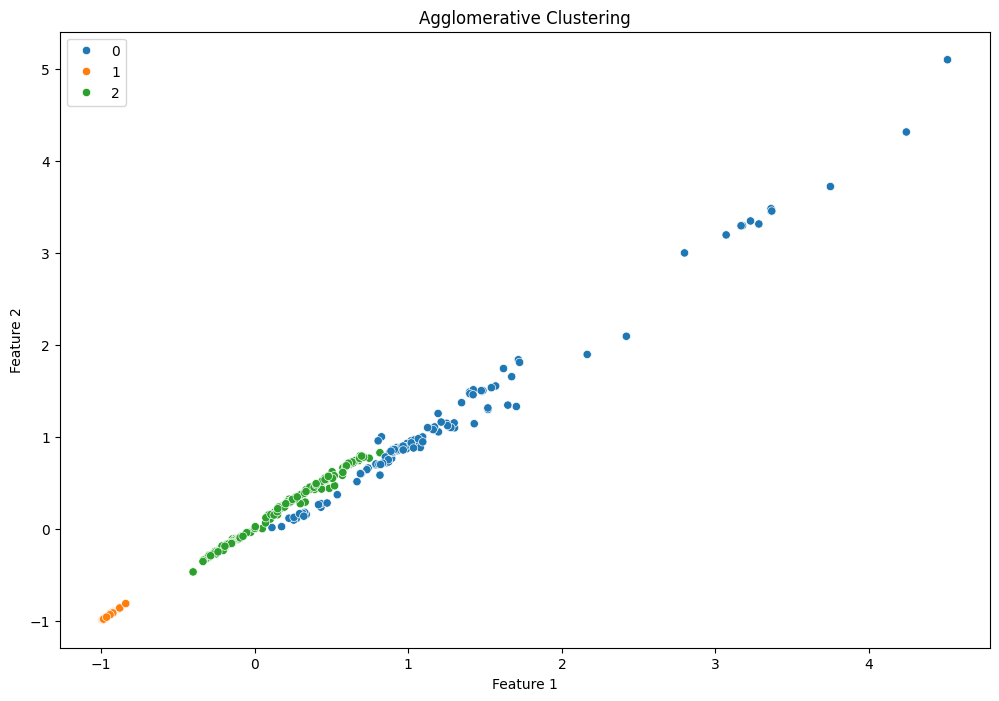

In [23]:
# agglomerative clustering 
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform agglomerative clustering
n_clusters = 3
agg = AgglomerativeClustering(n_clusters=n_clusters)
y_agg = agg.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_agg, palette='tab10')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.savefig(os.path.join(csv_dir, 'agglomerative_clustering.png'))




In [28]:
import glob
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import read_dot
import os

# Define labels for directories
labels = ["Adialer.C", "Allaple.L", "C2LOP.gen!g", "Dontovo.A", "Lolyda.AA1", "Lolyda.AT", "Rbot!gen",
          "Swizzor.gen!I", "Yuner.A", "Agent.FYI", "Alueron.gen!J", "C2LOP.P", "Fakerean", "Lolyda.AA2",
          "Malex.gen!J", "Skintrim.N", "VB.AT", "Allaple.A", "Autorun.K", "Dialplatform.B", "Instantaccess",
          "Lolyda.AA3", "Obfuscator.AD", "Swizzor.gen!E", "Wintrim.BX"]

# Directory to save batch files
batch_save_dir = 'batch_graph_features'
os.makedirs(batch_save_dir, exist_ok=True)

# Initialize list to store graph features and a batch counter
graph_features = []
batch_counter = 0

def save_batch(graph_features, batch_counter):
    batch_df = pd.DataFrame(graph_features)
    batch_file_path = os.path.join(batch_save_dir, f'graph_features_batch_{batch_counter}.csv')
    batch_df.to_csv(batch_file_path, index=False)
    print(f"Saved batch {batch_counter} with {len(graph_features)} records.")

for label in labels:
    dir_name = f'/data/saranyav/malimg_gnn/exe_files/{label}/'
    files = glob.glob(dir_name + '*.exe_cfg')
    for file in files:
        try:
            # Read the DOT file
            G = read_dot(file)
            
            # Ensure the graph is a directed graph
            G = nx.DiGraph(G)
            
            # Extract graph features
            num_nodes = G.number_of_nodes()
            num_edges = G.number_of_edges()
            avg_degree = sum(dict(G.degree()).values()) / len(G)
            density = nx.density(G)
            avg_clustering_coefficient = nx.average_clustering(G.to_undirected())
            
            # Append features to the list
            graph_features.append({
                'label': label,
                'file': file,
                'num_nodes': num_nodes,
                'num_edges': num_edges,
                'avg_degree': avg_degree,
                'density': density,
                'avg_clustering_coefficient': avg_clustering_coefficient
            })
            
            # Save batch after processing 100 files
            if len(graph_features) >= 100:
                save_batch(graph_features, batch_counter)
                graph_features = []
                batch_counter += 1
        except Exception as e:
            print(f"Error processing file {file}: {e}")

# Save any remaining features
if graph_features:
    save_batch(graph_features, batch_counter)

# Combine all batch files into a single DataFrame
all_batches = glob.glob(os.path.join(batch_save_dir, 'graph_features_batch_*.csv'))
combined_df = pd.concat((pd.read_csv(f) for f in all_batches), ignore_index=True)

# Display the combined DataFrame
import ace_tools as tools; tools.display_dataframe_to_user(name="Combined Graph Features DataFrame", dataframe=combined_df)

# Save the combined DataFrame to a CSV file
combined_df.to_csv('combined_graph_features.csv', index=False)

# Optionally, plot the average degrees by label
plt.figure(figsize=(10, 6))
combined_df.groupby('label')['avg_degree'].mean().plot(kind='bar')
plt.xlabel('Graph Label')
plt.ylabel('Average Degree')
plt.title('Average Degree of Graphs by Label')
plt.xticks(rotation=90)
plt.show()


KeyboardInterrupt: 

In [27]:
import glob
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import read_dot

labels = ["Adialer.C", "Allaple.L", "C2LOP.gen!g", "Dontovo.A", "Lolyda.AA1", "Lolyda.AT", "Rbot!gen",
          "Swizzor.gen!I", "Yuner.A", "Agent.FYI", "Alueron.gen!J", "C2LOP.P", "Fakerean", "Lolyda.AA2",
          "Malex.gen!J", "Skintrim.N", "VB.AT", "Allaple.A", "Autorun.K", "Dialplatform.B", "Instantaccess",
          "Lolyda.AA3", "Obfuscator.AD", "Swizzor.gen!E", "Wintrim.BX"]

# Initialize lists to store average degrees and labels for plotting
average_degrees = []
graph_labels = []

for label in labels:
    dir_name = f'/data/saranyav/malimg_gnn/exe_files/{label}/'
    files = glob.glob(dir_name + '*.exe_cfg')
    for file in files:
        try:
            # Read the DOT file
            G = read_dot(file)
            
            # Ensure the graph is a directed graph
            G = nx.DiGraph(G)
            
            # Calculate the average degree of the graph
            avg_degree = sum(dict(G.degree()).values()) / len(G)
            average_degrees.append(avg_degree)
            graph_labels.append(label)
        except Exception as e:
            print(f"Error processing file {file}: {e}")

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(average_degrees)), average_degrees, c='blue', alpha=0.5)
plt.xlabel('Graph Index')
plt.ylabel('Average Degree')
plt.title('Average Degree of Graphs by Label')
plt.xticks(range(len(labels)), labels, rotation=90)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [31]:
# for the three labels in the example dataset, turn the exe files into images and run a CNN

import os
import glob
import shutil
import subprocess
from torch_geometric.data import DataLoader
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader, TensorDataset


# images in /data/saranyav/malimg_gnn/malimg_paper_dataset_imgs/

# Define the labels (directories)
labels = ['C2LOP.P', 'Lolyda.AA2', 'Swizzor.gen!I']

# each subdirectory in the dataset contains the images for a specific label


In [27]:
# malware cnn
import torch.nn as nn

class MalConv(nn.Module):
    def __init__(self, num_classes):
        super(MalConv, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, num_classes)
        
    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [36]:
# Define dataset class
class MalwareDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []
        self.labels = []
        # Get list of subdirectories (one for each malware family)
        self.families = ['C2LOP.P', 'Lolyda.AA2', 'Swizzor.gen!I']# sorted(os.listdir(root_dir))
        # self.families.remove('adialer_10.npz')  # Remove this file
        # Load images and labels
        for i, family in enumerate(self.families):
            image_paths = os.listdir(os.path.join(root_dir, family))
            for path in image_paths:
                self.samples.append(os.path.join(family, path))
                self.labels.append(i)
    def __len__(self):
        return len(self.samples)   
    def __getitem__(self, idx):
        # Load image and label
        img_path = os.path.join(self.root_dir, self.samples[idx])
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')    
        # Apply transformations (if any)
        if self.transform:
            image = self.transform(image) 
        return image, label
    
# Define data transformations (e.g. normalization, data augmentation)
data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


filepath = "/data/saranyav/malimg_gnn/malimg_paper_dataset_imgs/"
# Create train and validation datasets
train_dataset_img = MalwareDataset(filepath, transform=data_transforms)
val_dataset_img = MalwareDataset(filepath, transform=data_transforms)

# Create train and validation data loaders
train_loader_img = DataLoader(train_dataset_img, batch_size=32, shuffle=True)
val_loader_img = DataLoader(val_dataset_img, batch_size=32, shuffle=False)

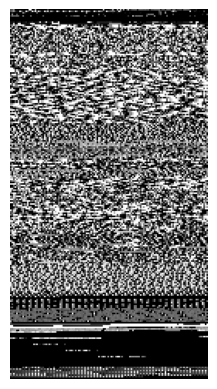

In [42]:
# plot one image from the dataset
import matplotlib.pyplot as plt
import numpy
img_filepath = "/data/saranyav/malimg_gnn/malimg_paper_dataset_imgs/Lolyda.AA2/0000c5a2b302f346b8dfe0090f726848.png"

# Load the image
img = Image.open(img_filepath).convert('RGB')

# Display the image
plt.imshow(numpy.asarray(img))
plt.axis('off')
plt.show()


In [39]:
criterion = nn.CrossEntropyLoss()
model = MalConv(num_classes=3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# save loss to plot later
train_loss = []
val_loss = []

# Train the model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader_img, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss.append(running_loss / len(train_loader_img))
    
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader_img)}")

Epoch 1, Loss: 1.7606340269247691
Epoch 2, Loss: 0.2350191472719113
Epoch 3, Loss: 0.1793130487203598
Epoch 4, Loss: 0.09461099378143747
Epoch 5, Loss: 0.03534811927626531
Epoch 6, Loss: 0.018121211288962512
Epoch 7, Loss: 0.003221724700415507
Epoch 8, Loss: 0.0014045214862562715
Epoch 9, Loss: 0.0009969168420260151
Epoch 10, Loss: 0.0007734940280594553


Accuracy: 100.0%
Total correct: 462, Total images: 462
Total validation images: 462
Confusion Matrix:
[[146   0   0]
 [  0 184   0]
 [  0   0 132]]


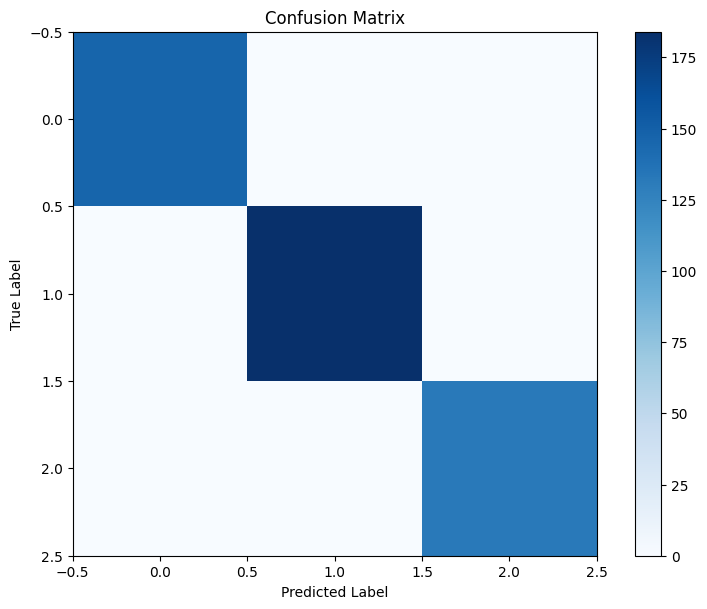

In [38]:
# Evaluate the model
model.eval()
correct = 0
total = 0

# confusion matrix
from sklearn.metrics import confusion_matrix
import numpy

# Get the predictions
predictions = []
true_labels = []
with torch.no_grad():
    for data in val_loader_img:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())
        true_labels.extend(labels.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print(f"Accuracy: {100 * correct / total}%")
print(f"Total correct: {correct}, Total images: {total}")
print(f"Total validation images: {len(val_dataset_img)}")
# print recall precision f1 score auc 

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
# plot the loss over epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_loss, marker='o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


In [21]:
import torch

# Load the dictionary containing graphs
graph_dict = torch.load('/data/saranyav/llavamal/graphs.pt')

import pandas as pd
import networkx as nx
import numpy as np
import os

def extract_features(graph):
    if graph.number_of_nodes() == 0:
        return None
    features = {
        'num_nodes': graph.number_of_nodes(),
        'num_edges': graph.number_of_edges(),
        'average_degree': sum(dict(graph.degree()).values()) / float(graph.number_of_nodes()),
        'clustering_coefficient': nx.average_clustering(graph),
        'graph_density': nx.density(graph)
    }
    return features

def process_graphs(graph_dict, save_interval=10, save_path='graph_features_partial.csv'):
    all_features = []
    start_index = 0

    # If a partial save exists, load it and continue
    if os.path.exists(save_path):
        partial_features_df = pd.read_csv(save_path)
        all_features = partial_features_df.to_dict('records')
        start_index = len(all_features)
    
    graph_items = list(graph_dict.items())

    for i, (file, graph_data) in enumerate(graph_items[start_index:], start=start_index):
        graph_tensor = graph_data['graph'].numpy()
        
        # Check if the tensor is an adjacency matrix
        if graph_tensor.ndim == 2:
            # Convert adjacency matrix to edge list
            rows, cols = np.where(graph_tensor > 0)
            edge_list = list(zip(rows, cols))
        else:
            raise ValueError(f"Unexpected tensor shape: {graph_tensor.shape}")
        
        # Create the NetworkX graph from the edge list
        nx_graph = nx.DiGraph(edge_list)
        
        features = extract_features(nx_graph)
        if features:  # Only add features if the graph has nodes
            features['label'] = graph_data['label']  # Add the label to the features
            all_features.append(features)
        
        # Save progress periodically
        if (i + 1) % save_interval == 0 or (i + 1) == len(graph_items):
            features_df = pd.DataFrame(all_features)
            features_df.to_csv(save_path, index=False)
            print(f'Saved progress: {i + 1} / {len(graph_items)} graphs processed')
    
    return all_features

all_features = process_graphs(graph_dict)



Saved progress: 2860 / 6846 graphs processed
Saved progress: 2870 / 6846 graphs processed
Saved progress: 2880 / 6846 graphs processed
Saved progress: 2890 / 6846 graphs processed
Saved progress: 2900 / 6846 graphs processed
Saved progress: 2910 / 6846 graphs processed
Saved progress: 2920 / 6846 graphs processed
Saved progress: 2930 / 6846 graphs processed
Saved progress: 2940 / 6846 graphs processed
Saved progress: 2950 / 6846 graphs processed
Saved progress: 2960 / 6846 graphs processed
Saved progress: 2970 / 6846 graphs processed
Saved progress: 2980 / 6846 graphs processed
Saved progress: 2990 / 6846 graphs processed
Saved progress: 3000 / 6846 graphs processed
Saved progress: 3010 / 6846 graphs processed
Saved progress: 3020 / 6846 graphs processed
Saved progress: 3030 / 6846 graphs processed
Saved progress: 3040 / 6846 graphs processed
Saved progress: 3050 / 6846 graphs processed
Saved progress: 3060 / 6846 graphs processed
Saved progress: 3070 / 6846 graphs processed
Saved prog

KeyboardInterrupt: 

In [ ]:
print('done')

In [22]:
features_df = pd.read_csv('graph_features_partial.csv')
print(features_df.columns)
features_df.to_csv('graph_features.csv', index=False)


Index(['num_nodes', 'num_edges', 'average_degree', 'clustering_coefficient',
       'graph_density', 'label'],
      dtype='object')


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the features
data = pd.read_csv('graph_features.csv')

# Check for NaN values
print("NaN values in each column:")
print(data.isna().sum())

# Drop rows with NaN values
data = data.dropna()

# Verify that the 'label' column exists
if 'label' in data.columns:
    print("Label column found.")
else:
    raise ValueError("Label column not found in the DataFrame")

# Separate features and labels
X = data.drop('label', axis=1)
y = data['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))


NaN values in each column:
num_nodes                    0
num_edges                    0
average_degree               0
clustering_coefficient       0
graph_density                0
label                     1620
dtype: int64
Label column found.
Accuracy: 0.8548972188633616


In [17]:
import pandas as pd

# Load the features
data = pd.read_csv('graph_features.csv')

# Check the columns in the DataFrame
print(data.columns)

Index(['num_nodes', 'num_edges', 'average_degree', 'clustering_coefficient',
       'graph_density'],
      dtype='object')


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
feature_importances = model.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importances')
plt.show()


NameError: name 'model' is not defined

In [2]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# Function to calculate graph features
def calculate_graph_features(edge_index, num_nodes):
    G = nx.DiGraph()
    edges = edge_index.t().tolist()  # Convert tensor to list of edges
    G.add_edges_from(edges)
    
    num_edges = G.number_of_edges()
    avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
    density = nx.density(G)
    num_connected_components = nx.number_weakly_connected_components(G)
    pagerank = np.mean(list(nx.pagerank(G).values())) if num_nodes > 0 else 0
    betweenness = np.mean(list(nx.betweenness_centrality(G).values())) if num_nodes > 0 else 0
    #eigenvector_centrality = np.mean(list(nx.eigenvector_centrality_numpy(G).values())) if num_nodes > 0 else 0
    # avg_in_degree = sum(dict(G.in_degree()).values()) / num_nodes if num_nodes > 0 else 0
    # avg_out_degree = sum(dict(G.out_degree()).values()) / num_nodes if num_nodes > 0 else 0
    #num_reciprocated_edges = sum(1 for u, v in G.edges() if G.has_edge(v, u))
    
    return {
        'num_nodes': num_nodes,
        'num_edges': num_edges,
        'avg_degree': avg_degree,
        'density': density,
        'num_connected_components': num_connected_components,
        'pagerank': pagerank,
        'betweenness': betweenness,
        #'eigenvector_centrality': eigenvector_centrality,
        # 'avg_in_degree': avg_in_degree,
        # 'avg_out_degree': avg_out_degree,
        #'num_reciprocated_edges': num_reciprocated_edges
    }

# Load the DataLoader
tr_loader = torch.load('imgmalware18_te_loader.pth')

# List to store graph features
features_list = []

# Iterate through the DataLoader and save the graph features in case it crashes or takes too long
for i, batch in enumerate(tr_loader):
    num_nodes = batch.x.size(0)
    features = calculate_graph_features(batch.edge_index, num_nodes)
    features['label'] = batch.y.item()  # Add the label for coloring
    features_list.append(features)
    # save 
    if i % 100 == 0:
        torch.save(features_list, 'features_list.pth')

# Extract feature names
feature_names = ['num_nodes', 'num_edges', 'avg_degree', 'density', 'num_connected_components', 
                 'pagerank', 'betweenness']

# Create scatter plots for each combination of features
for feature_x, feature_y in itertools.combinations(feature_names, 2):
    plt.figure(figsize=(10, 6))
    for features in features_list:
        plt.scatter(features[feature_x], features[feature_y], alpha=0.5, label=f"Label {features['label']}")
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title(f'{feature_x} vs. {feature_y}')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()
    plt.savefig(f'{feature_x}_vs_{feature_y}.png')


/home/saranyav/.conda/envs/ctf/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 11.0 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 95.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 98.5 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 107.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 101.0 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


In [3]:
! pip install pygraphviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.13-cp311-cp311-linux_x86_64.whl size=97918 sha256=9c701aba4e4f2d6a1a97af0c1c6e8837c3228a64cfc351345823891e9edf6537
  Stored in directory: /home/saranyav/.cache/pip/wheels/99/87/82/379ff97012dbfa9ff79c620b9aa7ebe1c7ddae966d7776f06f
Successfully built pygraphviz


In [6]:
import glob
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import read_dot

labels = ["Adialer.C", "Allaple.L", "C2LOP.gen!g", "Dontovo.A", "Lolyda.AA1", "Lolyda.AT", "Rbot!gen",
          "Swizzor.gen!I", "Yuner.A", "Agent.FYI", "Alueron.gen!J", "C2LOP.P", "Fakerean", "Lolyda.AA2",
          "Malex.gen!J", "Skintrim.N", "VB.AT", "Allaple.A", "Autorun.K", "Dialplatform.B", "Instantaccess",
          "Lolyda.AA3", "Obfuscator.AD", "Swizzor.gen!E", "Wintrim.BX"]

for label in labels:
    num_nodes = []
    avg_degrees = []
    dir_name = f'/data/saranyav/malimg_gnn/exe_files/{label}/'
    files = glob.glob(dir_name + '*.exe_cfg')
    for file in files:
        try:
            # Read the DOT file
            G = read_dot(file)
            
            # Ensure the graph is a directed graph
            G = nx.DiGraph(G)
            
            # Calculate the number of nodes
            n_nodes = len(G.nodes())
            
            # Calculate the average degree
            avg_degree = sum(dict(G.degree()).values()) / n_nodes
            
            num_nodes.append(n_nodes)
            avg_degrees.append(avg_degree)
        except Exception as e:
            print(f"Error processing file {file}: {e}")

    # Create scatter plot for the current label
    plt.figure(figsize=(10, 6))
    plt.scatter(num_nodes, avg_degrees, c='blue', alpha=0.5)
    plt.xlabel('Number of Nodes')
    plt.ylabel('Average Degree')
    plt.title(f'Number of Nodes vs. Average Degree for {label}')
    plt.grid(True)
    plt.show()


KeyboardInterrupt: 

In [8]:
! pip install torch_geometric

  Using cached torch_geometric-2.5.3-py3-none-any.whl.metadata (64 kB)
Using cached torch_geometric-2.5.3-py3-none-any.whl (1.1 MB)


In [9]:
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Function to create a graph from edge lists and calculate required metrics
def process_graphs(edge_lists):
    num_nodes = []
    avg_degrees = []
    
    for edge_list in edge_lists:
        G = nx.DiGraph()
        G.add_edges_from(edge_list)
        
        n_nodes = len(G.nodes())
        avg_degree = sum(dict(G.degree()).values()) / n_nodes if n_nodes > 0 else 0
        
        num_nodes.append(n_nodes)
        avg_degrees.append(avg_degree)
    
    return num_nodes, avg_degrees

# Load the data from the .pth files
tr_loader = torch.load('imgmalware18_tr_loader.pth')
te_loader = torch.load('imgmalware18_te_loader.pth')

# Assuming each loader contains a list of edge lists
tr_edge_lists = [data['edges'] for data in tr_loader]
te_edge_lists = [data['edges'] for data in te_loader]

# Process the training and test edge lists
tr_num_nodes, tr_avg_degrees = process_graphs(tr_edge_lists)
te_num_nodes, te_avg_degrees = process_graphs(te_edge_lists)

# Create scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(tr_num_nodes, tr_avg_degrees, c='blue', alpha=0.5, label='Training Data')
plt.scatter(te_num_nodes, te_avg_degrees, c='red', alpha=0.5, label='Test Data')
plt.xlabel('Number of Nodes')
plt.ylabel('Average Degree')
plt.title('Number of Nodes vs. Average Degree')
plt.legend()
plt.grid(True)
plt.show()


/home/saranyav/.conda/envs/ctf/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyError: 'edges'

# using pth files 

In [13]:
import torch

# Load the DataLoader
tr_loader = torch.load('imgmalware18_tr_loader.pth')

# Print the type of the DataLoader
print(f"Type of tr_loader: {type(tr_loader)}")

# Iterate through the DataLoader to inspect the first batch
for i, batch in enumerate(tr_loader):
    print(f"Batch {i}:")
    print(batch)
    print(f"Type of batch: {type(batch)}")
    
    # If batch is a Batch object, inspect its attributes
    if hasattr(batch, 'edge_index'):
        print(f"Edge index: {batch.edge_index}")
    if hasattr(batch, 'x'):
        print(f"Node features: {batch.x}")
    if hasattr(batch, 'y'):
        print(f"Labels: {batch.y}")
    
    # Break after the first batch for inspection purposes
    break


Type of tr_loader: <class 'torch_geometric.loader.dataloader.DataLoader'>
Batch 0:
DataBatch(edge_index=[2, 15231], x=[10221, 10], y=[1], batch=[10221], ptr=[2])
Type of batch: <class 'torch_geometric.data.batch.DataBatch'>
Edge index: tensor([[    0,     0,     1,  ..., 10217, 10218, 10220],
        [    1,     4,     2,  ..., 10218, 10219,  9903]])
Node features: tensor([[-0.6032,  0.2259,  0.5705,  ...,  0.4394,  0.4385, -0.8165],
        [ 0.3369, -1.0651, -0.7291,  ...,  0.7260,  0.7979,  0.6242],
        [ 0.5510,  0.9893,  0.8473,  ..., -0.3194, -0.4673,  1.3798],
        ...,
        [ 0.0966, -0.2038, -0.7929,  ..., -0.7094,  1.7659,  1.6042],
        [ 0.6654,  0.1902, -0.3602,  ...,  0.0532,  0.8558,  0.1051],
        [-0.5975,  1.0017,  0.2980,  ..., -0.7657,  1.5907,  1.1300]])
Labels: tensor([9])


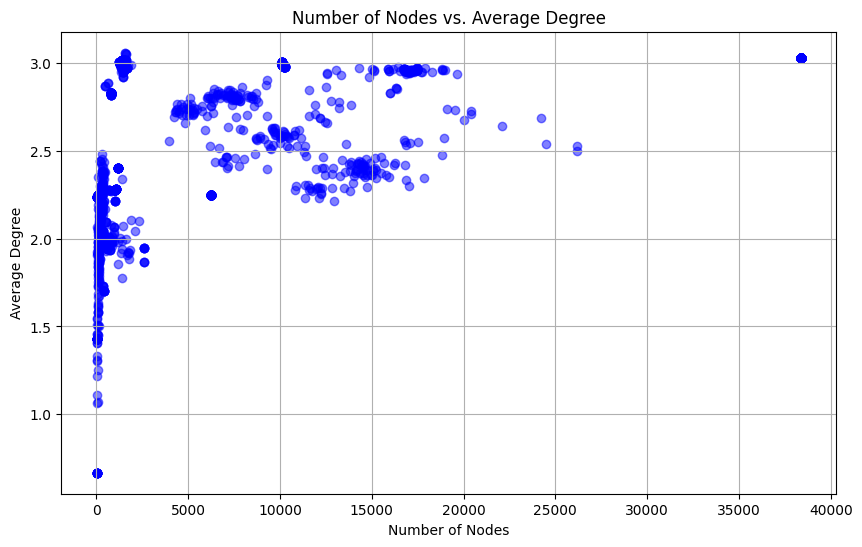

In [14]:
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Function to calculate average degree
def calculate_average_degree(edge_index, num_nodes):
    G = nx.DiGraph()
    edges = edge_index.t().tolist()  # Convert tensor to list of edges
    G.add_edges_from(edges)
    avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
    return avg_degree

# Load the DataLoader
tr_loader = torch.load('imgmalware18_tr_loader.pth')

# Lists to store the number of nodes and average degrees
num_nodes_list = []
avg_degrees_list = []

# Iterate through the DataLoader
for i, batch in enumerate(tr_loader):
    num_nodes = batch.x.size(0)
    avg_degree = calculate_average_degree(batch.edge_index, num_nodes)
    
    num_nodes_list.append(num_nodes)
    avg_degrees_list.append(avg_degree)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(num_nodes_list, avg_degrees_list, c='blue', alpha=0.5)
plt.xlabel('Number of Nodes')
plt.ylabel('Average Degree')
plt.title('Number of Nodes vs. Average Degree')
plt.grid(True)
plt.show()


In [15]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# get cmap
import matplotlib.cm as cm

# Function to calculate average degree
def calculate_average_degree(edge_index, num_nodes):
    G = nx.DiGraph()
    edges = edge_index.t().tolist()  # Convert tensor to list of edges
    G.add_edges_from(edges)
    avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
    return avg_degree

# Load the DataLoader
tr_loader = torch.load('imgmalware18_tr_loader.pth')

# Lists to store the number of nodes, average degrees, and labels
num_nodes_list = []
avg_degrees_list = []
labels_list = []

# Iterate through the DataLoader
for i, batch in enumerate(tr_loader):
    num_nodes = batch.x.size(0)
    avg_degree = calculate_average_degree(batch.edge_index, num_nodes)
    
    num_nodes_list.append(num_nodes)
    avg_degrees_list.append(avg_degree)
    labels_list.append(batch.y.item())  # Assuming y is a tensor with a single label



AttributeError: module 'matplotlib.cm' has no attribute 'get_cmap'

In [18]:
!pip install matplotlib==3.7.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 48.9 MB/s eta 0:00:0000:010:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.0
    Uninstalling matplotlib-3.9.0:
      Successfully uninstalled matplotlib-3.9.0


In [24]:
import matplotlib.cm as pltcm
cmap = pltcm.get_cmap('Reds')

# Create a color map for the labels
unique_labels = list(set(labels_list))
color_map = pltcm.get_cmap('viridis', len(unique_labels))
colors = [color_map(unique_labels.index(label)) for label in labels_list]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(num_nodes_list, avg_degrees_list, c=colors, alpha=0.5)
plt.xlabel('Number of Nodes')
plt.ylabel('Average Degree')
plt.title('Number of Nodes vs. Average Degree')
plt.grid(True)
plt.colorbar(plt.cm.ScalarMappable(cmap=color_map), ticks=range(len(unique_labels)), label='Label')
plt.show()

AttributeError: module 'matplotlib.cm' has no attribute 'get_cmap'

In [ ]:
# Create a color map for the labels
unique_labels = list(set(features['label'] for features in features_list))
color_map = plt.get_cmap('viridis', len(unique_labels))
label_to_color = {label: color_map(i) for i, label in enumerate(unique_labels)}

# Create scatter plots for each combination of features
for feature_x, feature_y in itertools.combinations(feature_names, 2):
    plt.figure(figsize=(10, 6))
    for features in features_list:
        plt.scatter(features[feature_x], features[feature_y], color=label_to_color[features['label']], alpha=0.5)
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title(f'{feature_x} vs. {feature_y}')
    plt.grid(True)
    plt.show()

In [5]:
from transformers import BertTokenizer, BertModel
import torch

# It's more efficient to initialize these outside the function if calling multiple times
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def embed_graph(file):
    # Load text data from the corresponding _cfg file
    try:
        with open(file.replace('.npy.npz', '.exe_cfg'), 'r') as f:
            text = f.read()
    except IOError:
        print(f"Error reading file {file}")
        return None
    # Handle the case where the text is empty or very short
    if not text:
        print("No content in file:", file)
        return torch.tensor([])  # Return an empty tensor or some placeholder
    # Check and manage text length
    encoded_input = tokenizer(text, max_length=512, padding='max_length', truncation=True, return_tensors='pt')
    # Generate embeddings
    with torch.no_grad():
        output = model(**encoded_input)
    # Use the pooled output for simplicity
    node_features = output.pooler_output
    return node_features

ModuleNotFoundError: No module named 'transformers'

In [3]:
labels = ["Adialer.C", "Allaple.L", "C2LOP.gen!g", "Dontovo.A", "Lolyda.AA1", "Lolyda.AT", "Rbot!gen","Swizzor.gen!I", "Yuner.A","Agent.FYI", "Alueron.gen!J", "C2LOP.P", "Fakerean", "Lolyda.AA2", "Malex.gen!J", "Skintrim.N", "VB.AT","Allaple.A", "Autorun.K", "Dialplatform.B", "Instantaccess", "Lolyda.AA3", "Obfuscator.AD", "Swizzor.gen!E","Wintrim.BX"]
import glob 

# dict containing {'graph':,'graph_embed,', 'label', 'input_ids' }
d = {}

for label in labels:
        dir_name = f'/data/saranyav/malimg_gnn/exe_files/{label}/'
        # Get a list of files (file paths) in the given directory
        # read edge list from file where it is in graph = torch.LongTensor(np.load(‘/data/saranyav/malimg_
        # /exe_files/Adialer.C/00a18d2aa4f2f4e6e8b0a8b5f6e2c5a3.npz’)[‘arr_0’])
        files = glob.glob(dir_name + '*.npz')
        for file in files:
                graph = torch.LongTensor(np.load(file)['arr_0'])
                graph_embed = []
                input_id = file.split('/')[-1].split('.')[0]
                d[file] = {'graph': graph, 'graph_embed': graph_embed, 'label': label, 'input_id': input_id}
                # print(d[file])
                # break

# save d to file 
torch.save(d, '/data/saranyav/llavamal/graphs.pt')
    

KeyboardInterrupt: 

In [2]:
# read d from file
d = torch.load('/data/saranyav/llavamal/graphs.pt')

In [3]:
import glob
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

labels = ["Adialer.C", "Allaple.L", "C2LOP.gen!g", "Dontovo.A", "Lolyda.AA1", "Lolyda.AT", "Rbot!gen",
          "Swizzor.gen!I", "Yuner.A", "Agent.FYI", "Alueron.gen!J", "C2LOP.P", "Fakerean", "Lolyda.AA2",
          "Malex.gen!J", "Skintrim.N", "VB.AT", "Allaple.A", "Autorun.K", "Dialplatform.B", "Instantaccess",
          "Lolyda.AA3", "Obfuscator.AD", "Swizzor.gen!E", "Wintrim.BX"]

# dict containing {'graph':,'graph_embed,', 'label', 'input_ids' }
d = {}

for label in labels:
    dir_name = f'/data/saranyav/malimg_gnn/exe_files/{label}/'
    files = glob.glob(dir_name + '*.npz')
    for file in files:
        graph = torch.LongTensor(np.load(file)['arr_0'])
        graph_embed = []
        input_id = file.split('/')[-1].split('.')[0]
        d[file] = {'graph': graph, 'graph_embed': graph_embed, 'label': label, 'input_id': input_id}


In [6]:
d

{'/data/saranyav/malimg_gnn/exe_files/Adialer.C/068f9e521028f506b8152b923c4bebb7.npy.npz': {'graph': tensor([[    0,     0,     1,  ..., 10217, 10218, 10220],
          [    1,     4,     2,  ..., 10218, 10219,  9903]]),
  'graph_embed': [],
  'label': 'Adialer.C',
  'input_id': '068f9e521028f506b8152b923c4bebb7'},
 '/data/saranyav/malimg_gnn/exe_files/Adialer.C/06cfd6ce7c118b76e73e081304254457.npy.npz': {'graph': tensor([[    0,     0,     1,  ..., 10078, 10079, 10081],
          [    1,     4,     2,  ..., 10079, 10080,  9798]]),
  'graph_embed': [],
  'label': 'Adialer.C',
  'input_id': '06cfd6ce7c118b76e73e081304254457'},
 '/data/saranyav/malimg_gnn/exe_files/Adialer.C/0190f0663b3a49b82a98a0b9bc01b3e2.npy.npz': {'graph': tensor([[    0,     0,     1,  ..., 10130, 10131, 10133],
          [    1,     4,     2,  ..., 10131, 10132,  9853]]),
  'graph_embed': [],
  'label': 'Adialer.C',
  'input_id': '0190f0663b3a49b82a98a0b9bc01b3e2'},
 '/data/saranyav/malimg_gnn/exe_files/Adialer.C/0

In [2]:
# d = torch.load('/data/saranyav/llavamal/graphs.pt')

In [7]:

def tensor_to_nx(graph_tensor):
    # Check the shape of the graph_tensor
    #print(f"Original tensor shape: {graph_tensor.shape}")
    
    # If the tensor shape is not what is expected, adjust accordingly
    if graph_tensor.dim() == 1:
        # Assuming graph_tensor is a flattened list of edges, reshape it into 2-tuples
        edges = [(graph_tensor[i].item(), graph_tensor[i + 1].item()) for i in range(0, len(graph_tensor), 2)]
    else:
        # Reshape the tensor to have pairs of elements as edges
        edges = graph_tensor.view(-1, 2).tolist()
    
    # Check the first few edges to ensure correctness
    #print(f"First few edges: {edges[:5]}")
    
    G = nx.Graph()
    G.add_edges_from(edges)
    return G




### Scatterplot


Error processing file /data/saranyav/malimg_gnn/exe_files/Adialer.C/03c65e4528f100e6961470bb15843680.exe_cfg: read_dot() requires pygraphviz http://pygraphviz.github.io/
Error processing file /data/saranyav/malimg_gnn/exe_files/Adialer.C/089f4461a36937ec378b32f2b0b5b0c6.exe_cfg: read_dot() requires pygraphviz http://pygraphviz.github.io/
Error processing file /data/saranyav/malimg_gnn/exe_files/Adialer.C/0561a42b51c30b2a28c809d2e3108a3e.exe_cfg: read_dot() requires pygraphviz http://pygraphviz.github.io/
Error processing file /data/saranyav/malimg_gnn/exe_files/Adialer.C/036847a65ac3418b63aaefa36fe86bb8.exe_cfg: read_dot() requires pygraphviz http://pygraphviz.github.io/
Error processing file /data/saranyav/malimg_gnn/exe_files/Adialer.C/053315aba3741339ab5557f59df64ea1.exe_cfg: read_dot() requires pygraphviz http://pygraphviz.github.io/
Error processing file /data/saranyav/malimg_gnn/exe_files/Adialer.C/0142a908ea824212e0bb936a2f2d0f13.exe_cfg: read_dot() requires pygraphviz http://py

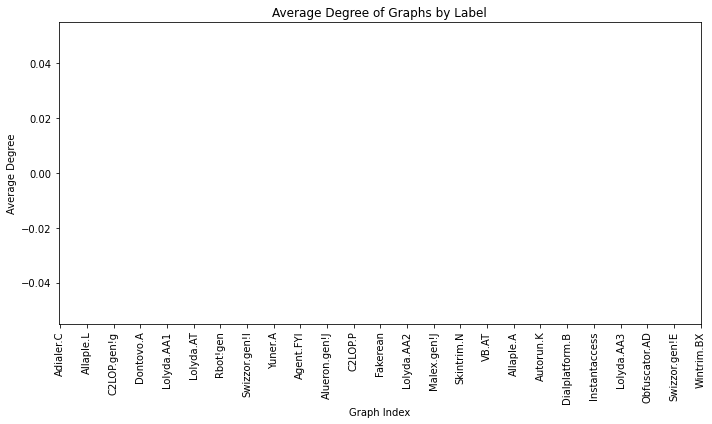

In [4]:
import glob
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import read_dot

labels = ["Adialer.C", "Allaple.L", "C2LOP.gen!g", "Dontovo.A", "Lolyda.AA1", "Lolyda.AT", "Rbot!gen",
          "Swizzor.gen!I", "Yuner.A", "Agent.FYI", "Alueron.gen!J", "C2LOP.P", "Fakerean", "Lolyda.AA2",
          "Malex.gen!J", "Skintrim.N", "VB.AT", "Allaple.A", "Autorun.K", "Dialplatform.B", "Instantaccess",
          "Lolyda.AA3", "Obfuscator.AD", "Swizzor.gen!E", "Wintrim.BX"]

# Initialize lists to store average degrees and labels for plotting
average_degrees = []
graph_labels = []

for label in labels:
    dir_name = f'/data/saranyav/malimg_gnn/exe_files/{label}/'
    files = glob.glob(dir_name + '*.exe_cfg')
    for file in files:
        try:
            # Read the DOT file
            G = read_dot(file)
            
            # Ensure the graph is a directed graph
            G = nx.DiGraph(G)
            
            # Calculate the average degree of the graph
            avg_degree = sum(dict(G.degree()).values()) / len(G)
            average_degrees.append(avg_degree)
            graph_labels.append(label)
        except Exception as e:
            print(f"Error processing file {file}: {e}")

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(average_degrees)), average_degrees, c='blue', alpha=0.5)
plt.xlabel('Graph Index')
plt.ylabel('Average Degree')
plt.title('Average Degree of Graphs by Label')
plt.xticks(range(len(labels)), labels, rotation=90)
plt.tight_layout()
plt.show()


In [13]:
!pip install seaborn 

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 294 kB 9.6 MB/s eta 0:00:01


In [18]:
import glob
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import os

labels = ["Adialer.C", "Allaple.L", "C2LOP.gen!g", "Dontovo.A", "Lolyda.AA1", "Lolyda.AT", "Rbot!gen",
          "Swizzor.gen!I", "Yuner.A", "Agent.FYI", "Alueron.gen!J", "C2LOP.P", "Fakerean", "Lolyda.AA2",
          "Malex.gen!J", "Skintrim.N", "VB.AT", "Allaple.A", "Autorun.K", "Dialplatform.B", "Instantaccess",
          "Lolyda.AA3", "Obfuscator.AD", "Swizzor.gen!E", "Wintrim.BX"]

# Dict containing {'graph':,'graph_embed,', 'label', 'input_ids' }
d = {}

for label in labels:
    dir_name = f'/data/saranyav/malimg_gnn/exe_files/{label}/'
    files = glob.glob(dir_name + '*.npz')
    for file in files:
        graph = torch.LongTensor(np.load(file)['arr_0'])
        graph_embed = []
        input_id = file.split('/')[-1].split('.')[0]
        d[file] = {'graph': graph, 'graph_embed': graph_embed, 'label': label, 'input_id': input_id}

def tensor_to_nx(graph_tensor):
    if graph_tensor.dim() == 1:
        edges = [(graph_tensor[i].item(), graph_tensor[i + 1].item()) for i in range(0, len(graph_tensor), 2)]
    else:
        edges = graph_tensor.view(-1, 2).tolist()
    G = nx.Graph()
    G.add_edges_from(edges)
    return G

# Directory to save intermediate results
output_dir = 'intermediate_results'
os.makedirs(output_dir, exist_ok=True)

# Calculate characteristics
for key, data in d.items():
    output_file = os.path.join(output_dir, f"{data['input_id']}_characteristics.json")
    
    # Skip if already processed
    if os.path.exists(output_file):
        continue

    G = tensor_to_nx(data['graph'])
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    avg_degree = np.mean([deg for node, deg in G.degree()])
    density = nx.density(G)
    num_connected_components = nx.number_connected_components(G)
    pagerank = np.mean(list(nx.pagerank(G).values()))
    betweenness = np.mean(list(nx.betweenness_centrality(G).values()))
    triangles = np.mean(list(nx.triangles(G).values()))
    clustering_coeff = nx.average_clustering(G)
    eigenvector_centrality = np.mean(list(nx.eigenvector_centrality(G).values()))

    char = {
        'num_nodes': num_nodes,
        'num_edges': num_edges,
        'avg_degree': avg_degree,
        'density': density,
        'num_connected_components': num_connected_components,
        'pagerank': pagerank,
        'betweenness': betweenness,
        # 'triangles': triangles,
        # 'clustering_coeff': clustering_coeff,
        'eigenvector_centrality': eigenvector_centrality,
        'avg_in_degree': 0,
        'avg_out_degree': 0,
        'num_reciprocated_edges': 0,
        # k core 
    }

    if G.is_directed():
        avg_in_degree = np.mean([deg for node, deg in G.in_degree()])
        avg_out_degree = np.mean([deg for node, deg in G.out_degree()])
        num_reciprocated_edges = len([(u, v) for u, v in G.edges() if G.has_edge(v, u)])

        char['avg_in_degree'] = avg_in_degree
        char['avg_out_degree'] = avg_out_degree
        char['num_reciprocated_edges'] = num_reciprocated_edges

    with open(output_file, 'w') as f:
        json.dump(char, f)

# Load the saved results
characteristics = []
labels_list = []

for file in os.listdir(output_dir):
    if file.endswith('_characteristics.json'):
        with open(os.path.join(output_dir, file), 'r') as f:
            char = json.load(f)
            characteristics.append(char)
            label = file.split('_')[0]  # Adjust as per your naming convention
            labels_list.append(label)

# Convert to DataFrame for seaborn
df = pd.DataFrame(characteristics)
df['label'] = labels_list

# Create pair plots
sns.pairplot(df, hue='label', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()


KeyboardInterrupt: 

In [17]:
import itertools 
characteristics = []
labels_list = []

for file in os.listdir(output_dir):
    if file.endswith('_characteristics.json'):
        with open(os.path.join(output_dir, file), 'r') as f:
            char = json.load(f)
            characteristics.append(char)
            label = file.split('_')[0]  # Adjust as per your naming convention
            labels_list.append(label)

# Convert to DataFrame for seaborn
df = pd.DataFrame(characteristics)
df['label'] = labels_list

# List of features to plot
features = [
    'num_nodes', 'num_edges', 'avg_degree', 'density', 'num_connected_components',
    'pagerank', 'betweenness', 'triangles', 'clustering_coeff', 'eigenvector_centrality',
    'avg_in_degree', 'avg_out_degree', 'num_reciprocated_edges'
]

# Create scatter plots for each pair of features and save them individually
for f1, f2 in itertools.combinations(features, 2):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x=f1, y=f2, hue='label', alpha=0.5)
    plt.title(f'{f1} vs {f2}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'{f1}_vs_{f2}.png')
    plt.close()

In [ ]:
import itertools 
# List of features to plot
features = [
    'num_nodes', 'num_edges', 'avg_degree', 'density', 'num_connected_components',
    'pagerank', 'betweenness', 'triangles', 'clustering_coeff', 'eigenvector_centrality',
    'avg_in_degree', 'avg_out_degree', 'num_reciprocated_edges'
]

# Plot pair plots individually
for f1, f2 in itertools.combinations(features, 2):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=f1, y=f2, hue='label', alpha=0.5)
    plt.title(f'{f1} vs {f2}')
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.legend(loc='best', bbox_to_anchor=(1, 1), title='Label')
    plt.tight_layout()
    plot_file = os.path.join(plot_dir, f'{f1}_vs_{f2}.png')
    plt.savefig(plot_file)
    plt.close()

### bar charts 

In [ ]:
# Calculate characteristics
characteristics = {}

for key, data in d.items():
    G = tensor_to_nx(data['graph'])
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    avg_degree = np.mean([deg for node, deg in G.degree()])
    density = nx.density(G)
    num_connected_components = nx.number_connected_components(G)
    
    characteristics[key] = {
        'num_nodes': num_nodes,
        'num_edges': num_edges,
        'avg_degree': avg_degree,
        'density': density,
        'num_connected_components': num_connected_components,
    }

    if G.is_directed():
        avg_in_degree = np.mean([deg for node, deg in G.in_degree()])
        avg_out_degree = np.mean([deg for node, deg in G.out_degree()])
        num_reciprocated_edges = len([(u, v) for u, v in G.edges() if G.has_edge(v, u)])
        
        characteristics[key]['avg_in_degree'] = avg_in_degree
        characteristics[key]['avg_out_degree'] = avg_out_degree
        characteristics[key]['num_reciprocated_edges'] = num_reciprocated_edges

# Check if the characteristics are being calculated correctly
for key, value in characteristics.items():
    print(f"Graph: {key}")
    for k, v in value.items():
        print(f"  {k}: {v}")

# Prepare data for plotting
labels = [data['label'] for data in d.values()]
num_nodes = [characteristics[key]['num_nodes'] for key in d.keys()]
num_edges = [characteristics[key]['num_edges'] for key in d.keys()]
avg_degrees = [characteristics[key]['avg_degree'] for key in d.keys()]
densities = [characteristics[key]['density'] for key in d.keys()]
num_connected_components = [characteristics[key]['num_connected_components'] for key in d.keys()]

# Check if the graph is directed before attempting to retrieve in/out degrees and reciprocated edges
if any('avg_in_degree' in characteristics[key] for key in characteristics.keys()):
    avg_in_degrees = [characteristics[key].get('avg_in_degree', 0) for key in d.keys()]
    avg_out_degrees = [characteristics[key].get('avg_out_degree', 0) for key in d.keys()]
    num_reciprocated_edges = [characteristics[key].get('num_reciprocated_edges', 0) for key in d.keys()]
else:
    avg_in_degrees = []
    avg_out_degrees = []
    num_reciprocated_edges = []

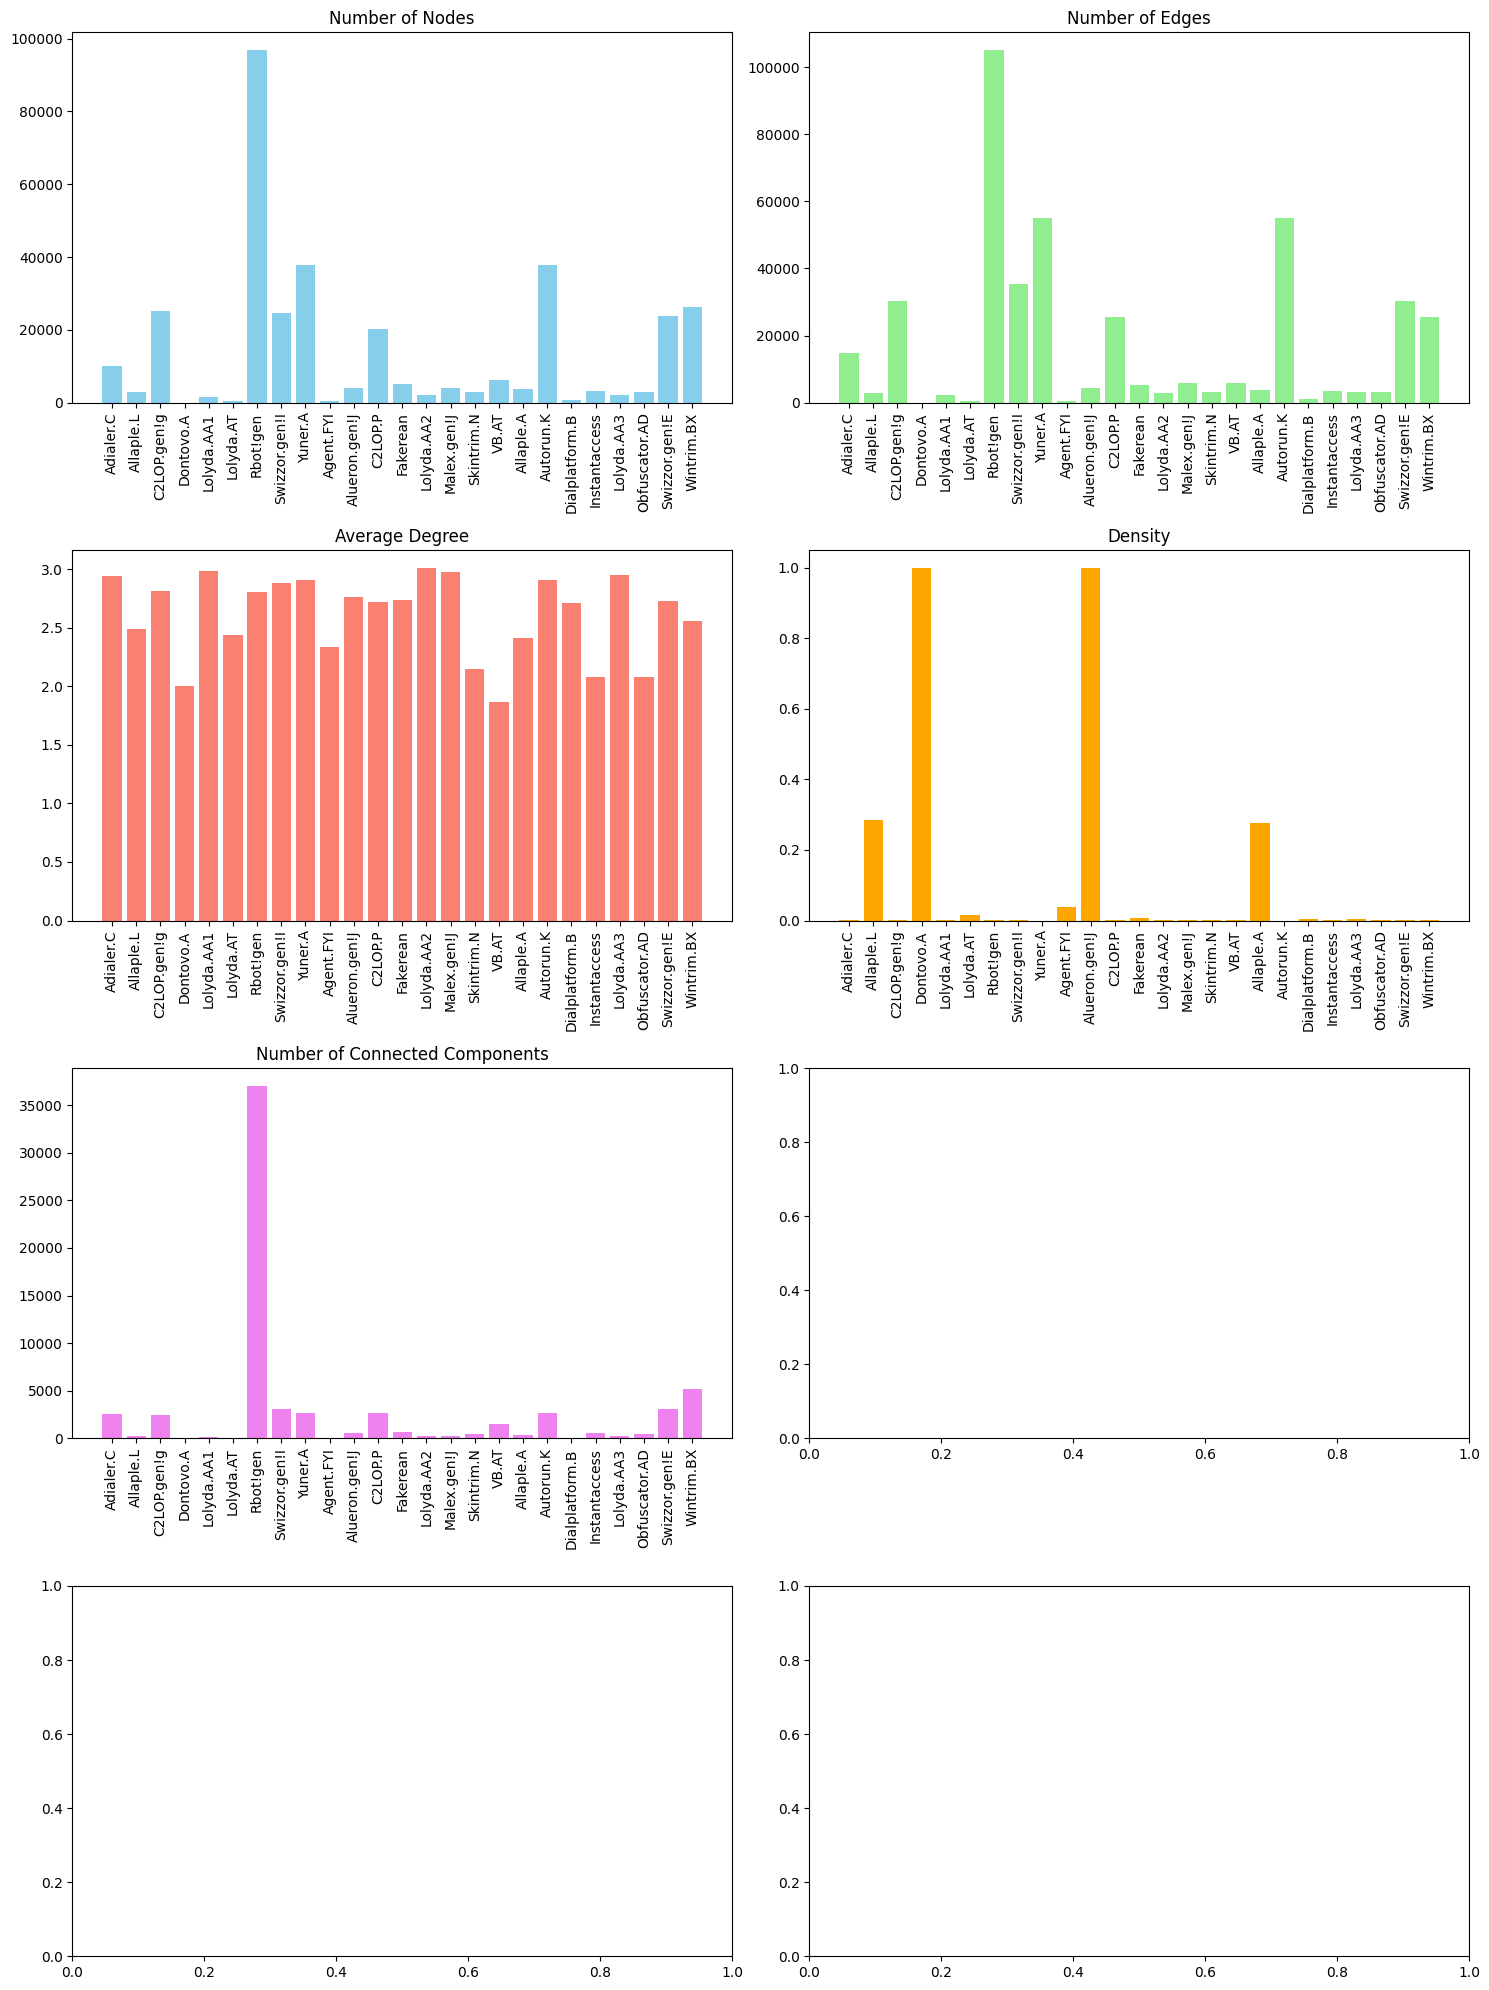

In [26]:

# Plot the characteristics
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Number of nodes
axs[0, 0].bar(labels, num_nodes, color='skyblue')
axs[0, 0].set_title('Number of Nodes')
axs[0, 0].tick_params(axis='x', rotation=90)

# Number of edges
axs[0, 1].bar(labels, num_edges, color='lightgreen')
axs[0, 1].set_title('Number of Edges')
axs[0, 1].tick_params(axis='x', rotation=90)

# Average degree
axs[1, 0].bar(labels, avg_degrees, color='salmon')
axs[1, 0].set_title('Average Degree')
axs[1, 0].tick_params(axis='x', rotation=90)

# Density
axs[1, 1].bar(labels, densities, color='orange')
axs[1, 1].set_title('Density')
axs[1, 1].tick_params(axis='x', rotation=90)

# Number of connected components
axs[2, 0].bar(labels, num_connected_components, color='violet')
axs[2, 0].set_title('Number of Connected Components')
axs[2, 0].tick_params(axis='x', rotation=90)

# # Average in-degree and out-degree if available
# if avg_in_degrees and avg_out_degrees:
#     axs[2, 1].bar(labels, avg_in_degrees, color='cyan', label='Avg In-Degree')
#     axs[2, 1].bar(labels, avg_out_degrees, color='magenta', alpha=0.6, label='Avg Out-Degree')
#     axs[2, 1].set_title('Average In-Degree and Out-Degree')
#     axs[2, 1].tick_params(axis='x', rotation=90)
#     axs[2, 1].legend()

# # Number of reciprocated edges if available
# if num_reciprocated_edges:
#     axs[3, 0].bar(labels, num_reciprocated_edges, color='coral')
#     axs[3, 0].set_title('Number of Reciprocated Edges')
#     axs[3, 0].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [6]:

# Calculate PageRank
page_ranks = {}
for key, data in d.items():
    G = tensor_to_nx(data['graph'])
    page_rank = nx.pagerank(G)
    page_ranks[key] = page_rank

# Prepare data for plotting
labels = [data['label'] for data in d.values()]
page_ranks = [page_ranks[key] for key in d.keys()]

# Plot the PageRank
fig, ax = plt.subplots(figsize=(15, 5))
for label, page_rank in zip(labels, page_ranks):
    ax.bar(list(page_rank.keys()), list(page_rank.values()), alpha=0.5, label=label)

ax.set_title('PageRank')
ax.set_xlabel('Node')
ax.set_ylabel('PageRank')
ax.legend()
plt.tight_layout()
plt.show()




KeyboardInterrupt: 

In [ ]:

# eigenvector centrality

# Calculate Eigenvector Centrality
eigenvector_centralities = {}
for key, data in d.items():
    G = tensor_to_nx(data['graph'])
    eigenvector_centrality = nx.eigenvector_centrality(G)
    eigenvector_centralities[key] = eigenvector_centrality

# Prepare data for plotting
labels = [data['label'] for data in d.values()]
eigenvector_centralities = [eigenvector_centralities[key] for key in d.keys()]

# Plot the Eigenvector Centrality
fig, ax = plt.subplots(figsize=(15, 5))
for label, eigenvector_centrality in zip(labels, eigenvector_centralities):
    ax.bar(list(eigenvector_centrality.keys()), list(eigenvector_centrality.values()), alpha=0.5, label=label)

ax.set_title('Eigenvector Centrality')
ax.set_xlabel('Node')
ax.set_ylabel('Eigenvector Centrality')
ax.legend()
plt.tight_layout()
plt.show()



KeyError: 'Adialer.C'

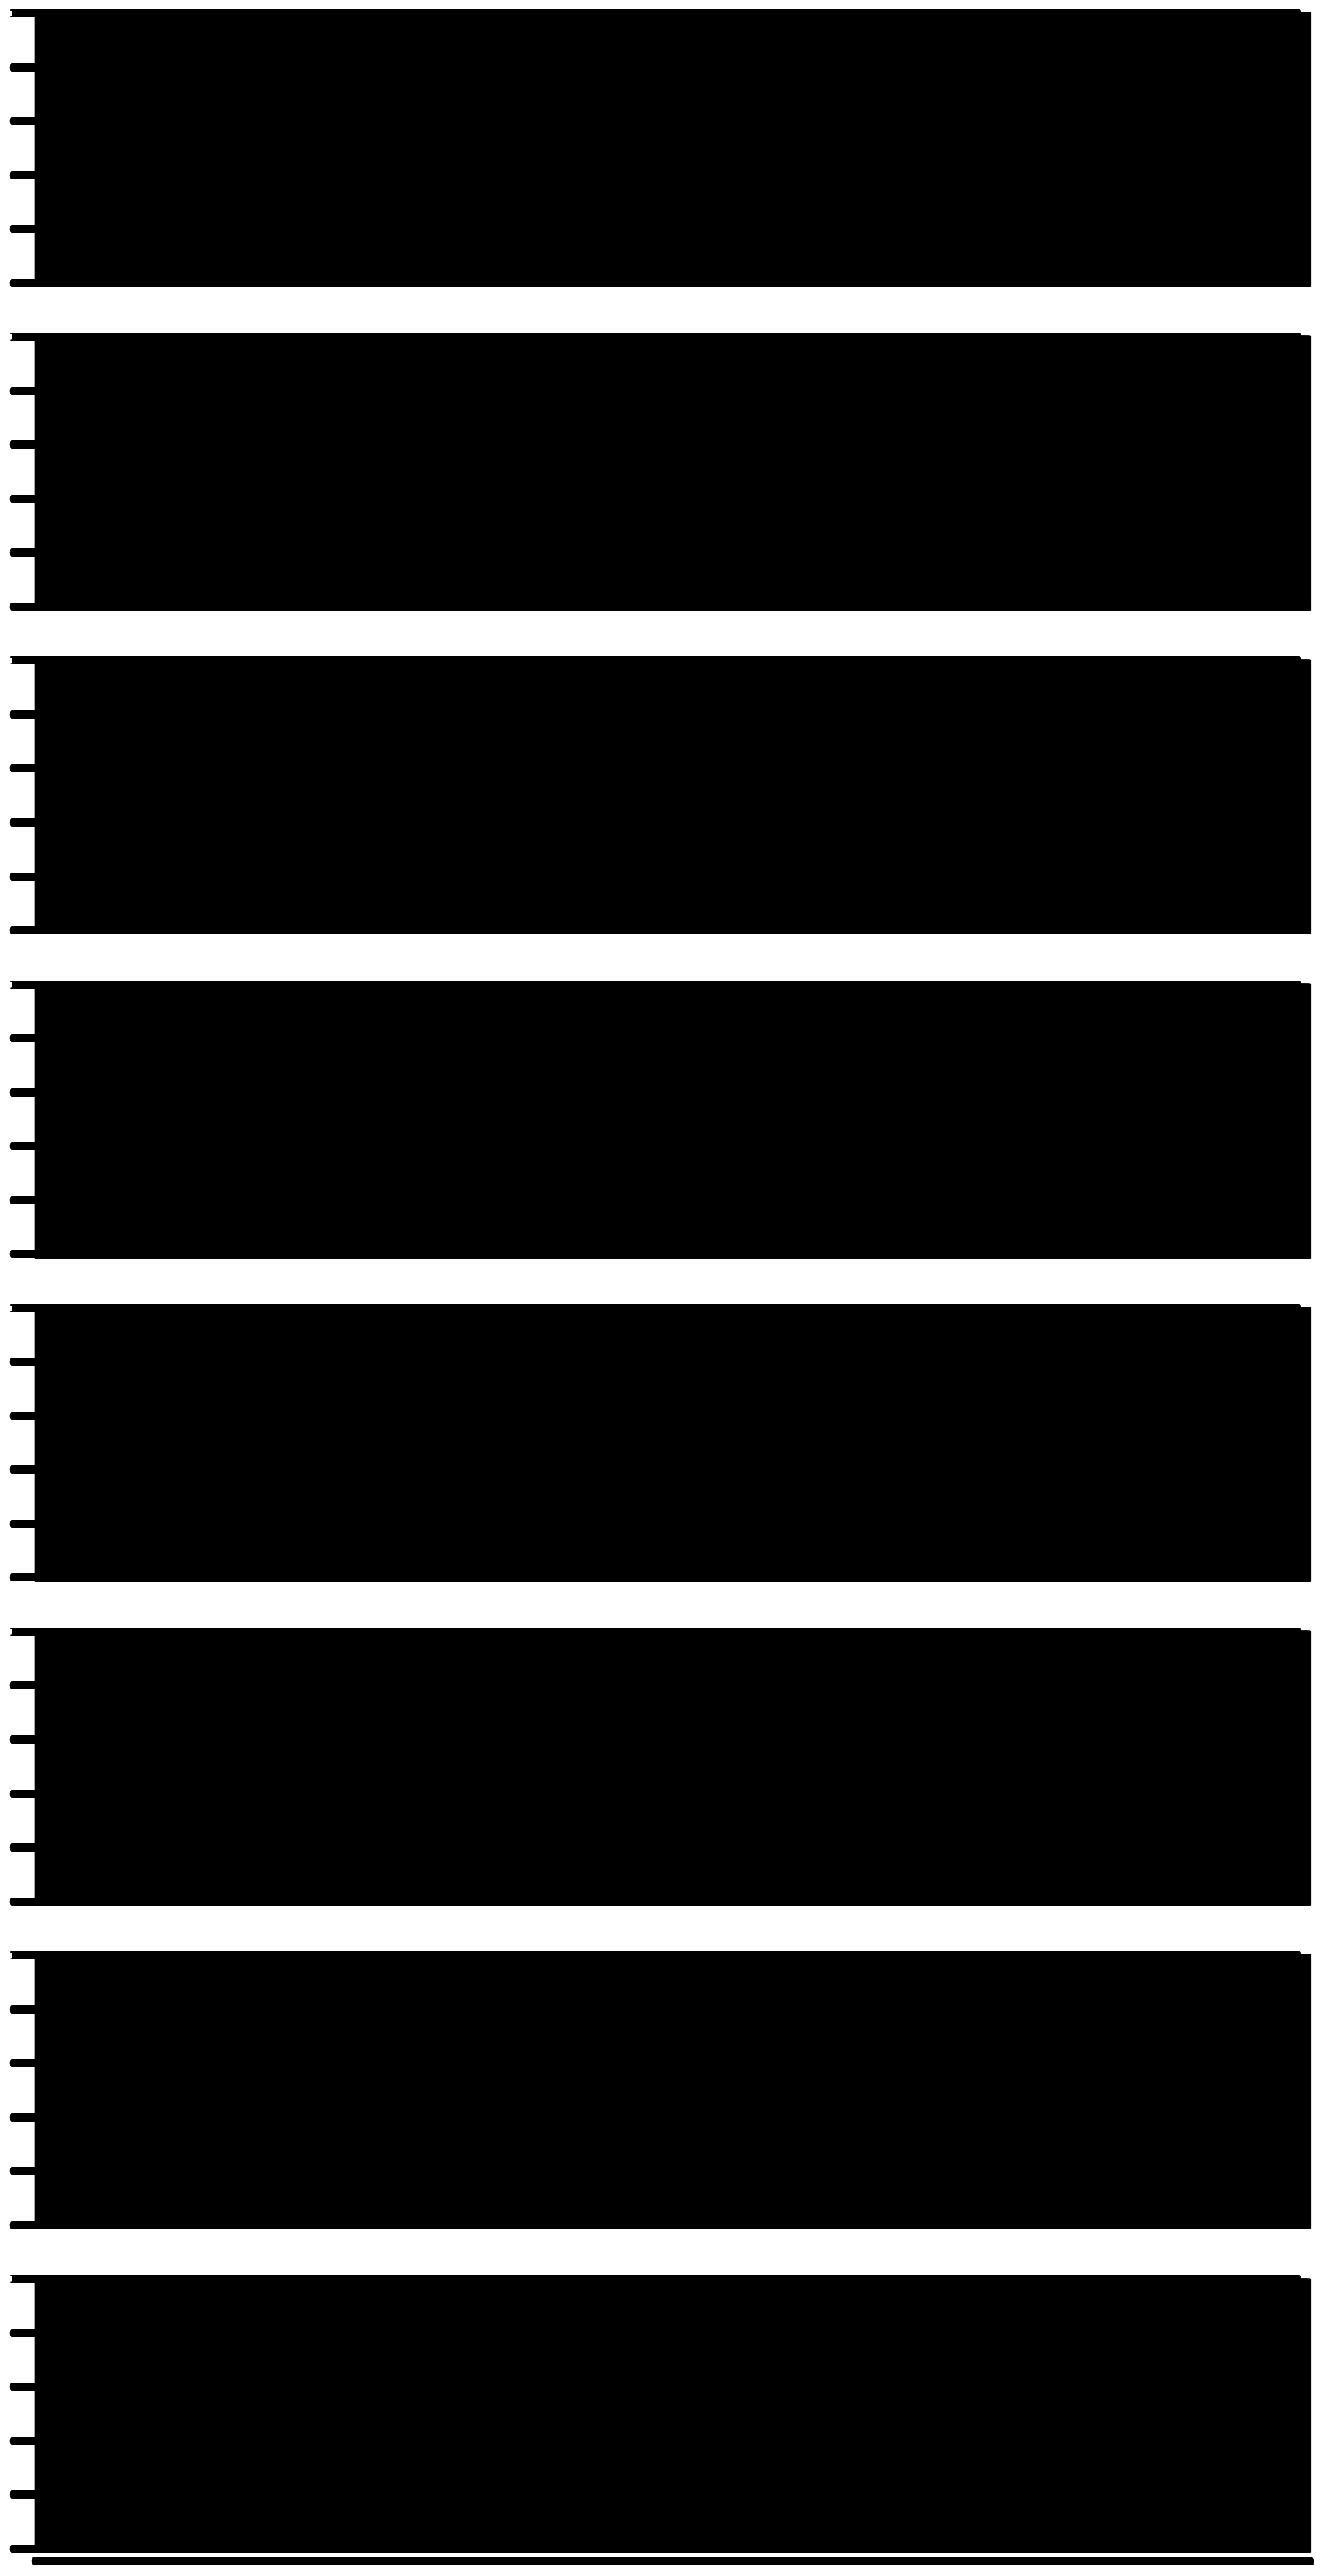

In [27]:
# Plotting distributions
metrics = ['num_nodes', 'num_edges', 'avg_degree', 'density', 'num_connected_components', 
           'avg_in_degree', 'avg_out_degree', 'num_reciprocated_edges']

fig, axs = plt.subplots(len(metrics), len(labels), figsize=(20, 40), sharex='col')

for i, metric in enumerate(metrics):
    for j, label in enumerate(labels):
        if characteristics[label]:
            values = [char[metric] for char in characteristics[label] if metric in char]
            axs[i, j].scatter(range(len(values)), values, alpha=0.6)
            axs[i, j].set_title(f'{label} - {metric}')
            axs[i, j].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [6]:
# Calculate characteristics
characteristics = []
labels_list = []

# import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


for key, data in d.items():
    G = tensor_to_nx(data['graph'])
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    avg_degree = np.mean([deg for node, deg in G.degree()])
    density = nx.density(G)
    num_connected_components = nx.number_connected_components(G)
    
    char = {
        'num_nodes': num_nodes,
        'num_edges': num_edges,
        'avg_degree': avg_degree,
        'density': density,
        'num_connected_components': num_connected_components,
        'avg_in_degree': 0,  # Placeholder for undirected graph
        'avg_out_degree': 0,  # Placeholder for undirected graph
        'num_reciprocated_edges': 0  # Placeholder for undirected graph
    }

    if G.is_directed():
        avg_in_degree = np.mean([deg for node, deg in G.in_degree()])
        avg_out_degree = np.mean([deg for node, deg in G.out_degree()])
        num_reciprocated_edges = len([(u, v) for u, v in G.edges() if G.has_edge(v, u)])
        
        char['avg_in_degree'] = avg_in_degree
        char['avg_out_degree'] = avg_out_degree
        char['num_reciprocated_edges'] = num_reciprocated_edges

    characteristics.append(list(char.values()))
    labels_list.append(data['label'])

# Convert labels to numerical values
label_to_num = {label: idx for idx, label in enumerate(labels)}
num_to_label = {idx: label for label, idx in label_to_num.items()}
y = [label_to_num[label] for label in labels_list]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(characteristics, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=labels))

feature_names = ['num_nodes', 'num_edges', 'avg_degree', 'density', 'num_connected_components', 
                 'avg_in_degree', 'avg_out_degree', 'num_reciprocated_edges']
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

/home/saranyav/.conda/envs/llava/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/saranyav/.conda/envs/llava/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


NameError: name 'labels' is not defined

In [9]:

# # this is for generating graph embeddings 
# # for each edgelist in the directory, read the edgelist, embed the graph using the GNN, and save the graph embedding to the dictionary with the graph_embed key

# def generate_graph_embeddings():
#     graphs = torch.load('/data/saranyav/llavamal/graphs.pt')
#     for file in graphs:
#         graph_embed = embed_graph(file)
#         # error handle
#         if graph_embed is None:
#             continue
#         graphs[file]['graph_embed'] = graph_embed.cpu().detach().numpy()
#     torch.save(graphs, '/data/saranyav/llavamal/graphs.pt')

# generate_graph_embeddings()

In [8]:
graphs = torch.load('/data/saranyav/llavamal/graphs.pt')

In [2]:
# file = '/data/saranyav/malimg_gnn/exe_files/Adialer.C/06e21af7e2fdd67622d0122e113b0d53.exe_cfg'
# G = nx.nx_pydot.read_dot(file)
# adj_matrix = nx.adjacency_matrix(G)
# print(adj_matrix.todense())

#TODO feature engineering 

In [3]:
# i think this is how i get the edge_lists out?

def save_tensor(file):
    nxg = nx.nx_pydot.read_dot(file)
    print('entered fn')
    print('done reading')
    for (_, _, d) in nxg.edges(data=True):
        print('popping')
        d.clear()
    G = nx.from_networkx(nxg) # turns it into tensors ['edge_index', 'num_nodes', 'label'] 
    return(G)


overall_stats = [] 
def save_tensors_malima():
    labels = ["Adialer.C", "Allaple.L", "C2LOP.gen!g", "Dontovo.A", "Lolyda.AA1", "Lolyda.AT", "Rbot!gen",
            "Swizzor.gen!I", "Yuner.A",
            "Agent.FYI", "Alueron.gen!J", "C2LOP.P", "Fakerean", "Lolyda.AA2", "Malex.gen!J", "Skintrim.N", "VB.AT",
            "Allaple.A", "Autorun.K", "Dialplatform.B", "Instantaccess", "Lolyda.AA3", "Obfuscator.AD", "Swizzor.gen!E",
            "Wintrim.BX"]
    for label in labels:
        dir_name = f'/data/saranyav/malimg_gnn/exe_files/{label}/'
        # Get a list of files (file paths) in the given directory
        executed_cfg_files = filter(os.path.isfile,
                                    glob.glob(dir_name + '*_cfg'))
        # Sort list of files in directory by size
        executed_cfg_files = sorted(executed_cfg_files,
                                    key=lambda x: os.stat(x).st_size)

        executed_cfg_files = [x for x in executed_cfg_files if os.stat(x).st_size > 0]
        print(f'Number of files in {label}: {len(executed_cfg_files)}')
        for file in tqdm(executed_cfg_files, total=len(executed_cfg_files)):
            # for file in executed_cfg_files:
            try:
                G = save_tensor(file)
                # print to see if it fails here
                print('done')
                stats = generate_graphical_features(G)
                # save stats, edge_list, graph_ID from filename and label to overall_stats 
                overall_stats.append({'stats': stats, 'edge_list': G['edge_index'], 'graph_ID': file, 'label': label})
            except:
                print('no file found ', file)
    return(overall_stats)


# def save_tensors():

#     dir_name = '/data/saranyav/malimg_gnn/exe_files/Adialer.C/'
#     # Get a list of files (file paths) in the given directory 
#     executed_cfg_files = filter( os.path.isfile,
#                             glob.glob(dir_name + '*_cfg') )
#     # Sort list of files in directory by size 
#     executed_cfg_files = sorted( executed_cfg_files,
#                             key =  lambda x: os.stat(x).st_size )

#     executed_cfg_files = [x for x in executed_cfg_files if os.stat(x).st_size > 0]



def generate_graphical_features(G):
    edges_in = G['edge_index'][0]
    edges_out = G['edge_index'][1]

    in_deg = torch_geometric.utils.degree(edges_in)
    out_deg = torch_geometric.utils.degree(edges_out)

    mean_in_deg = statistics.mean(in_deg.tolist())
    mean_out_deg = statistics.mean(out_deg.tolist())
    median_in_deg = statistics.median(in_deg.tolist())
    median_out_deg = statistics.median(out_deg.tolist())
    mode_in_deg = statistics.mode(in_deg.tolist())
    mode_out_deg = statistics.mode(out_deg.tolist())
    nodes = G.num_nodes
    edges = G.num_edges

    stats = [mean_in_deg, mean_out_deg, median_in_deg, median_out_deg, mode_in_deg, mode_out_deg, nodes, edges] 
    return(stats)


# executed_cfg_files = save_tensors_malima()


In [12]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, labels, test_size=0.2, random_state=42)

# Train a simple Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')




ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


In [2]:
import torch
from torch_geometric.loader import DataLoader


def change_batchsize(loader, batch_size=16):
    torch.manual_seed(1234)
    new_loader = DataLoader(loader.dataset, batch_size=batch_size, shuffle = True)
    return new_loader

In [3]:
torch.manual_seed(1234)

# lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

batch_size = 64
device = 'cuda:0'

tr_loader = change_batchsize(
    torch.load('imgmalware18_tr_loader.pth'),
    batch_size)

te_loader = change_batchsize(
    torch.load('imgmalware18_te_loader.pth'),
    batch_size)



In [4]:
import networkx as nx
import numpy as np

def calculate_graph_features(graph):
    features = {}
    
    # Basic Graph Features
    features['number_of_nodes'] = graph.number_of_nodes()
    features['number_of_edges'] = graph.number_of_edges()
    features['average_degree'] = np.mean([degree for node, degree in graph.degree()])
    # median degree, quantiles, degree profile 
    # Centrality Measures
    features['degree_centrality'] = nx.degree_centrality(graph)
    features['betweenness_centrality'] = nx.betweenness_centrality(graph)
    features['closeness_centrality'] = nx.closeness_centrality(graph)
    features['eigenvector_centrality'] = nx.eigenvector_centrality(graph, max_iter=1000)
    
    # Clustering
    features['average_clustering'] = nx.average_clustering(graph)
    features['clustering_coefficient'] = nx.clustering(graph)
    
    # Connectivity
    features['is_connected'] = nx.is_connected(graph)
    if features['is_connected']:
        features['diameter'] = nx.diameter(graph)
    else:
        features['diameter'] = None
    
    # Components
    features['number_of_connected_components'] = nx.number_connected_components(graph)
    features['largest_component_size'] = len(max(nx.connected_components(graph), key=len))
    
    # Assortativity
    features['degree_assortativity_coefficient'] = nx.degree_assortativity_coefficient(graph)
    
    return features



In [10]:
# get graph features from each graph in the te_loader 




In [11]:

# Assuming te_loader is loaded with your graph data
graph_te_loader = torch.load('imgmalware18_te_loader.pth')
te_dataset = GraphFeatureDataset(graph_te_loader)
te_loader_with_features = DataLoader(te_dataset, batch_size=64)


AttributeError: 'GlobalStorage' object has no attribute 'number_of_nodes'

In [ ]:

# Now you can use te_loader_with_features in your model training or evaluation

G = nx.karate_club_graph()
graph_features = calculate_graph_features(G)
print(graph_features)


In [ ]:
# generate graph features
## get centrality from graph dataset 

graphs = torch.load('imgmalware18_graphs.pth')

# calculate the centrality of each node in the graphs
centrality = []

for graph in graphs:
    centrality.append(graph.centrality)

# get other graph features 
features = []
for graph in graphs:
    features.append(graph.x)




# entropy 




In [ ]:
# centrality 
# triangles 
# library versus homemade functions 